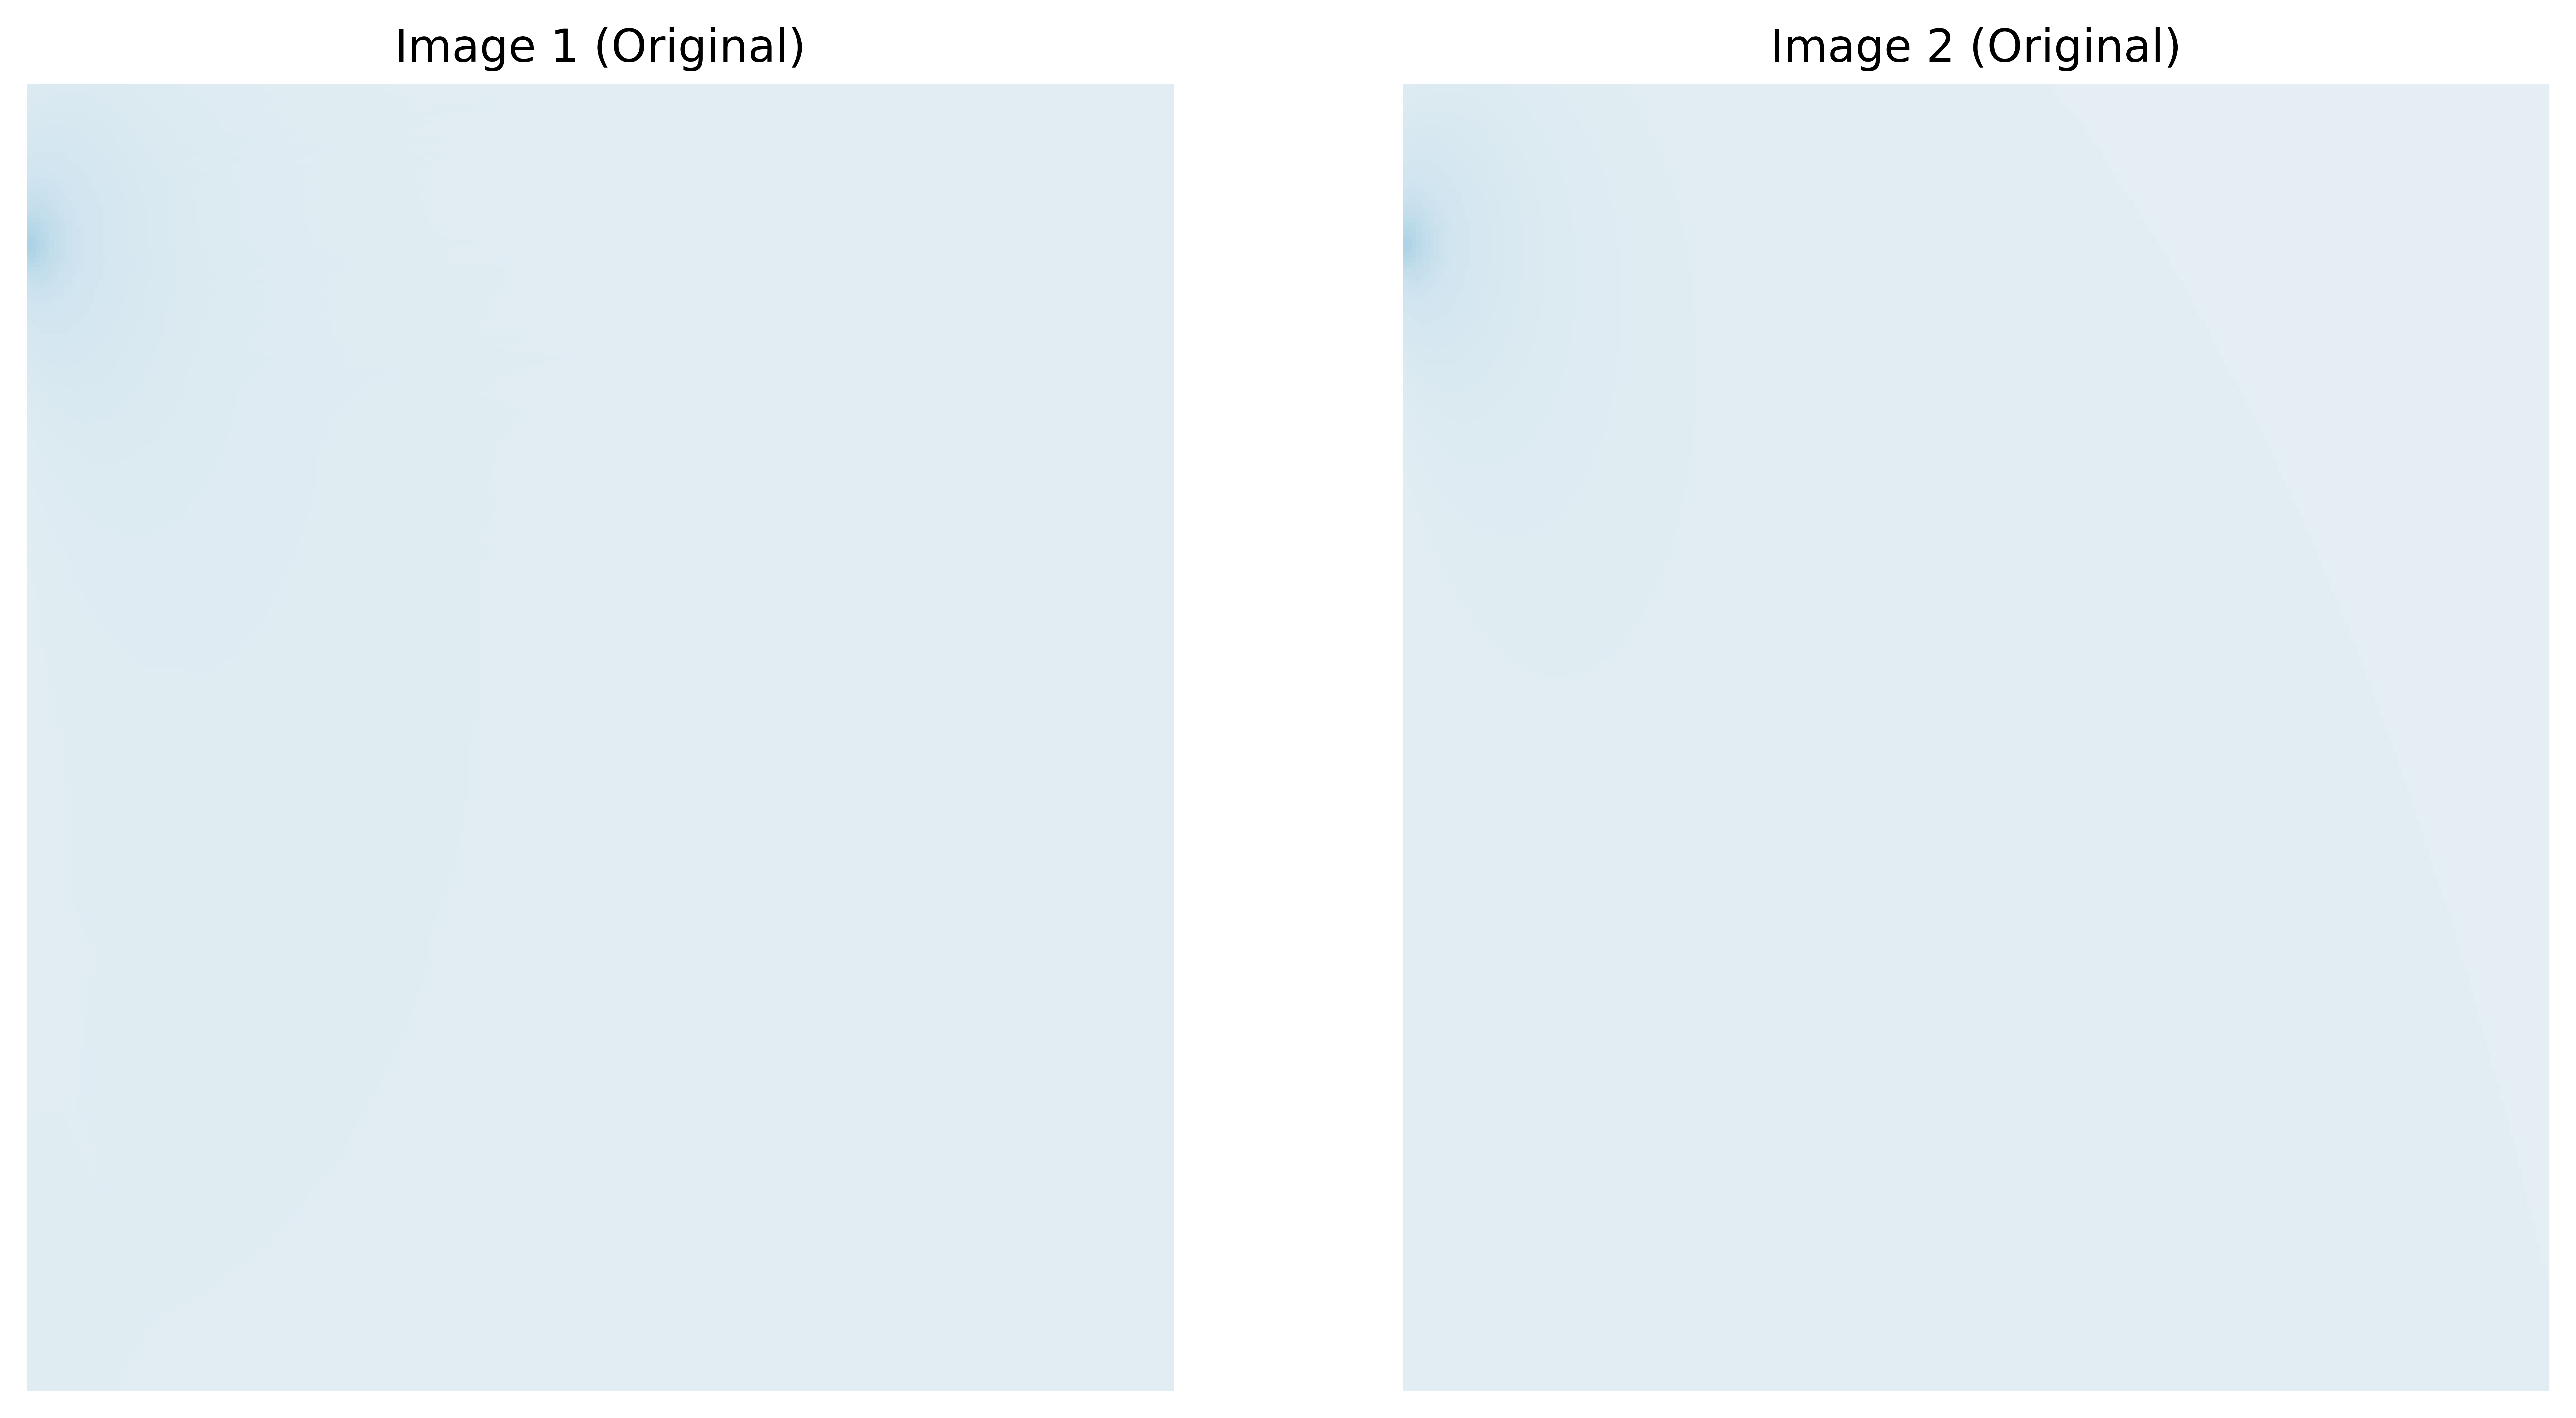

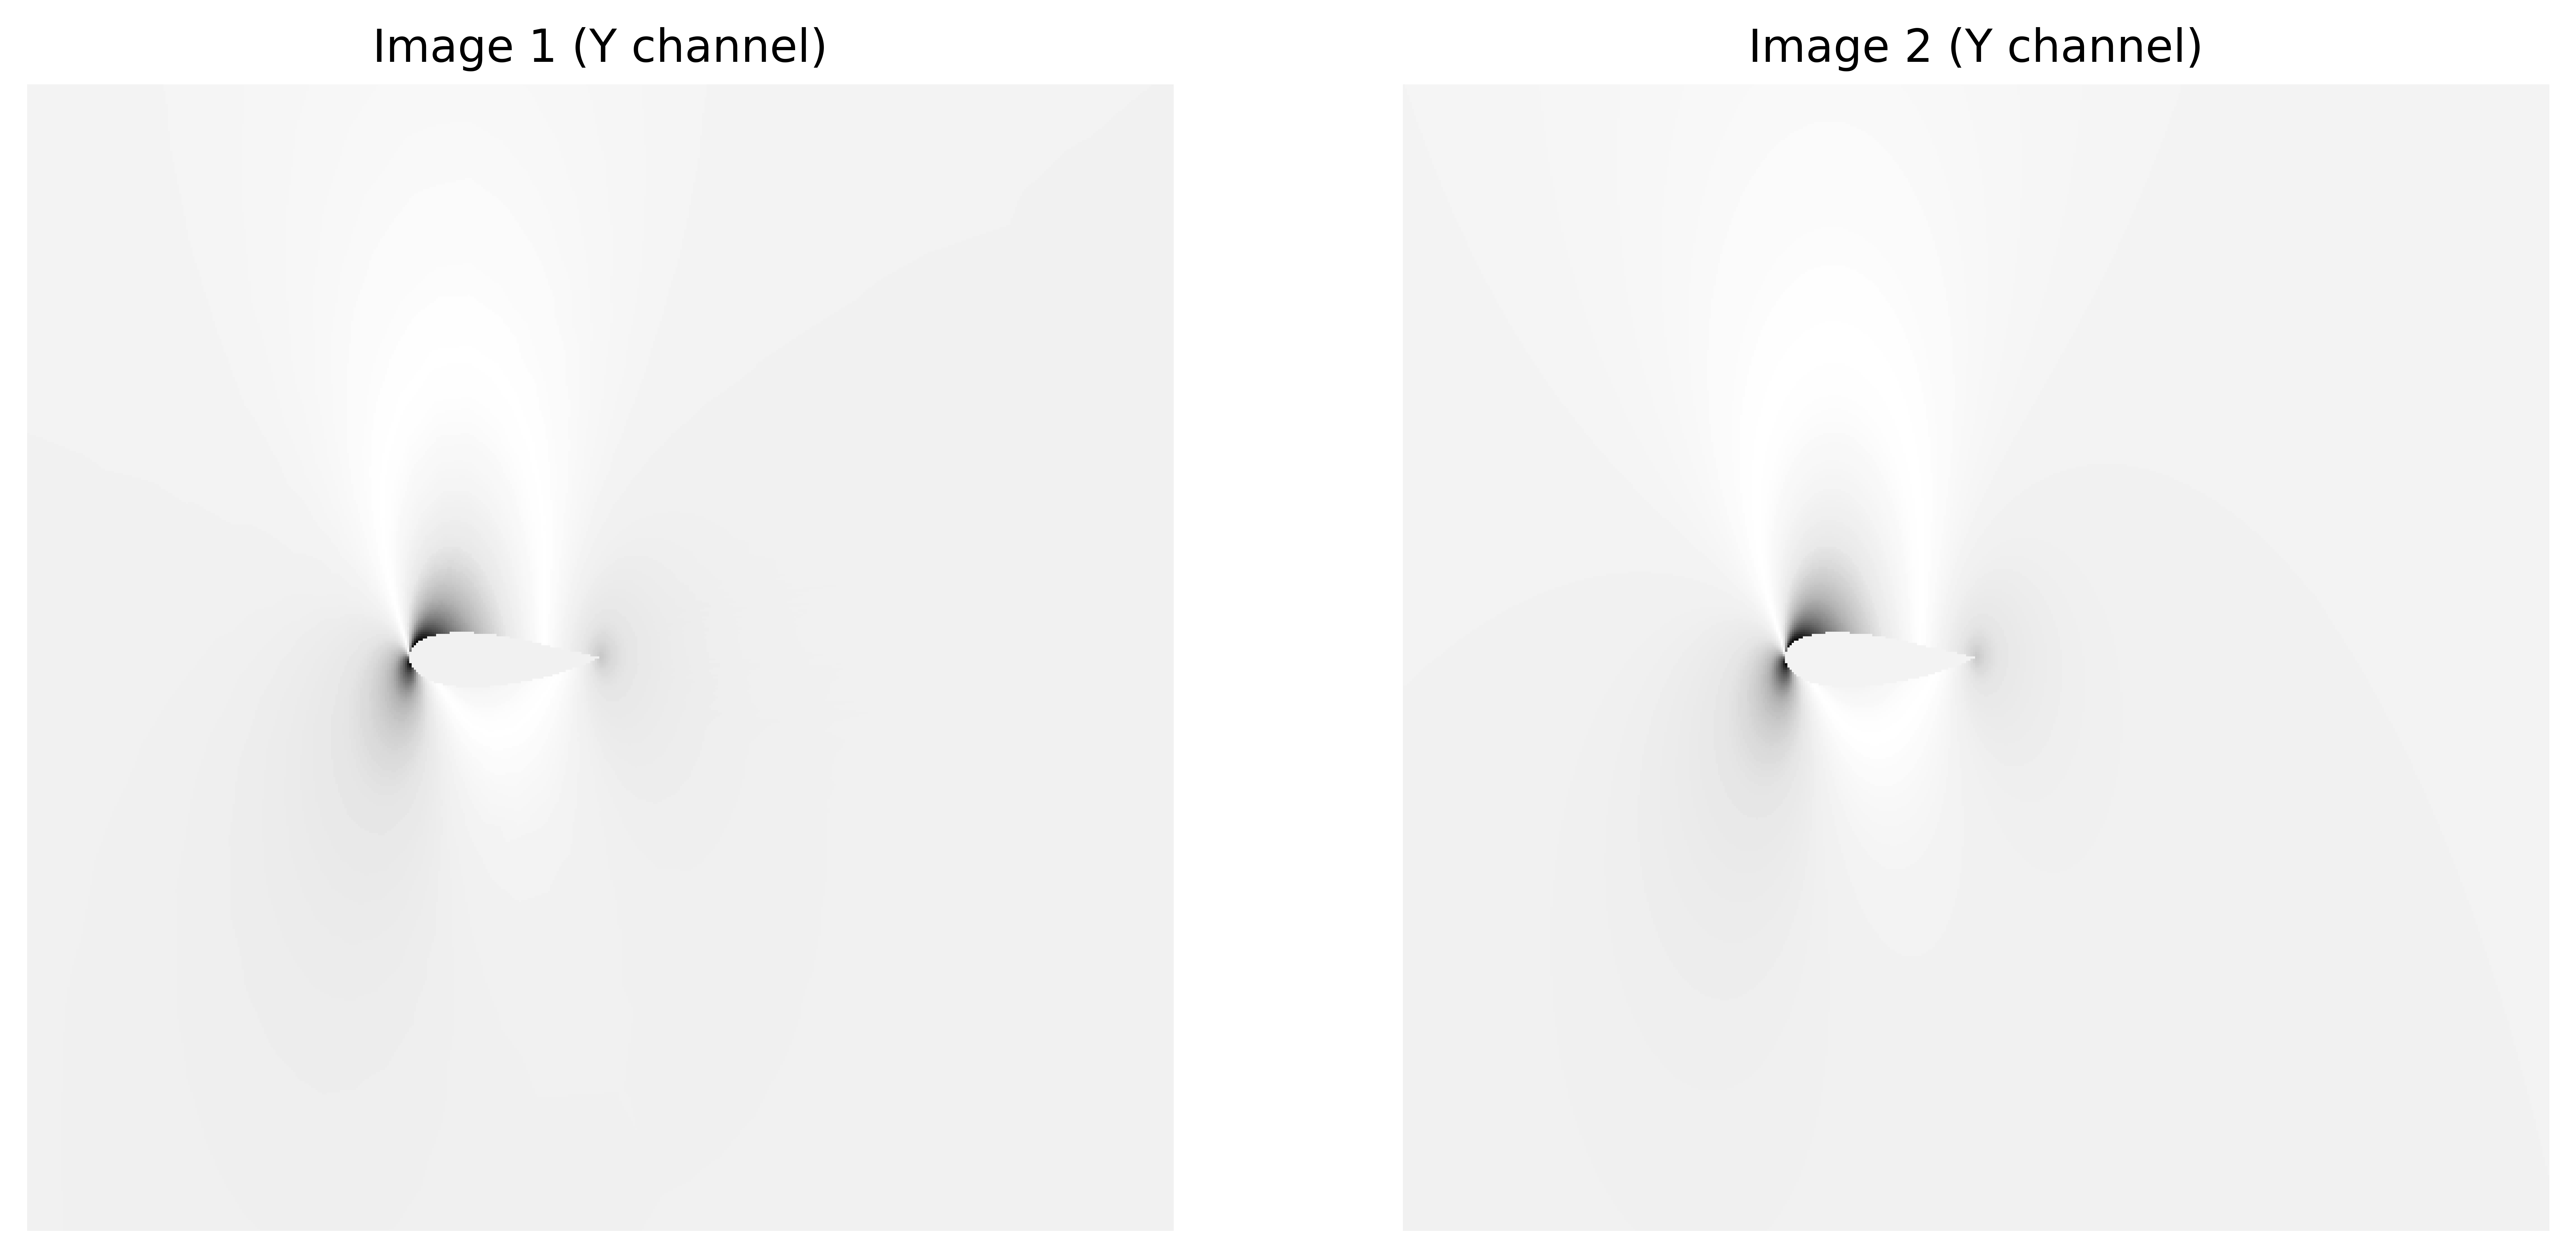

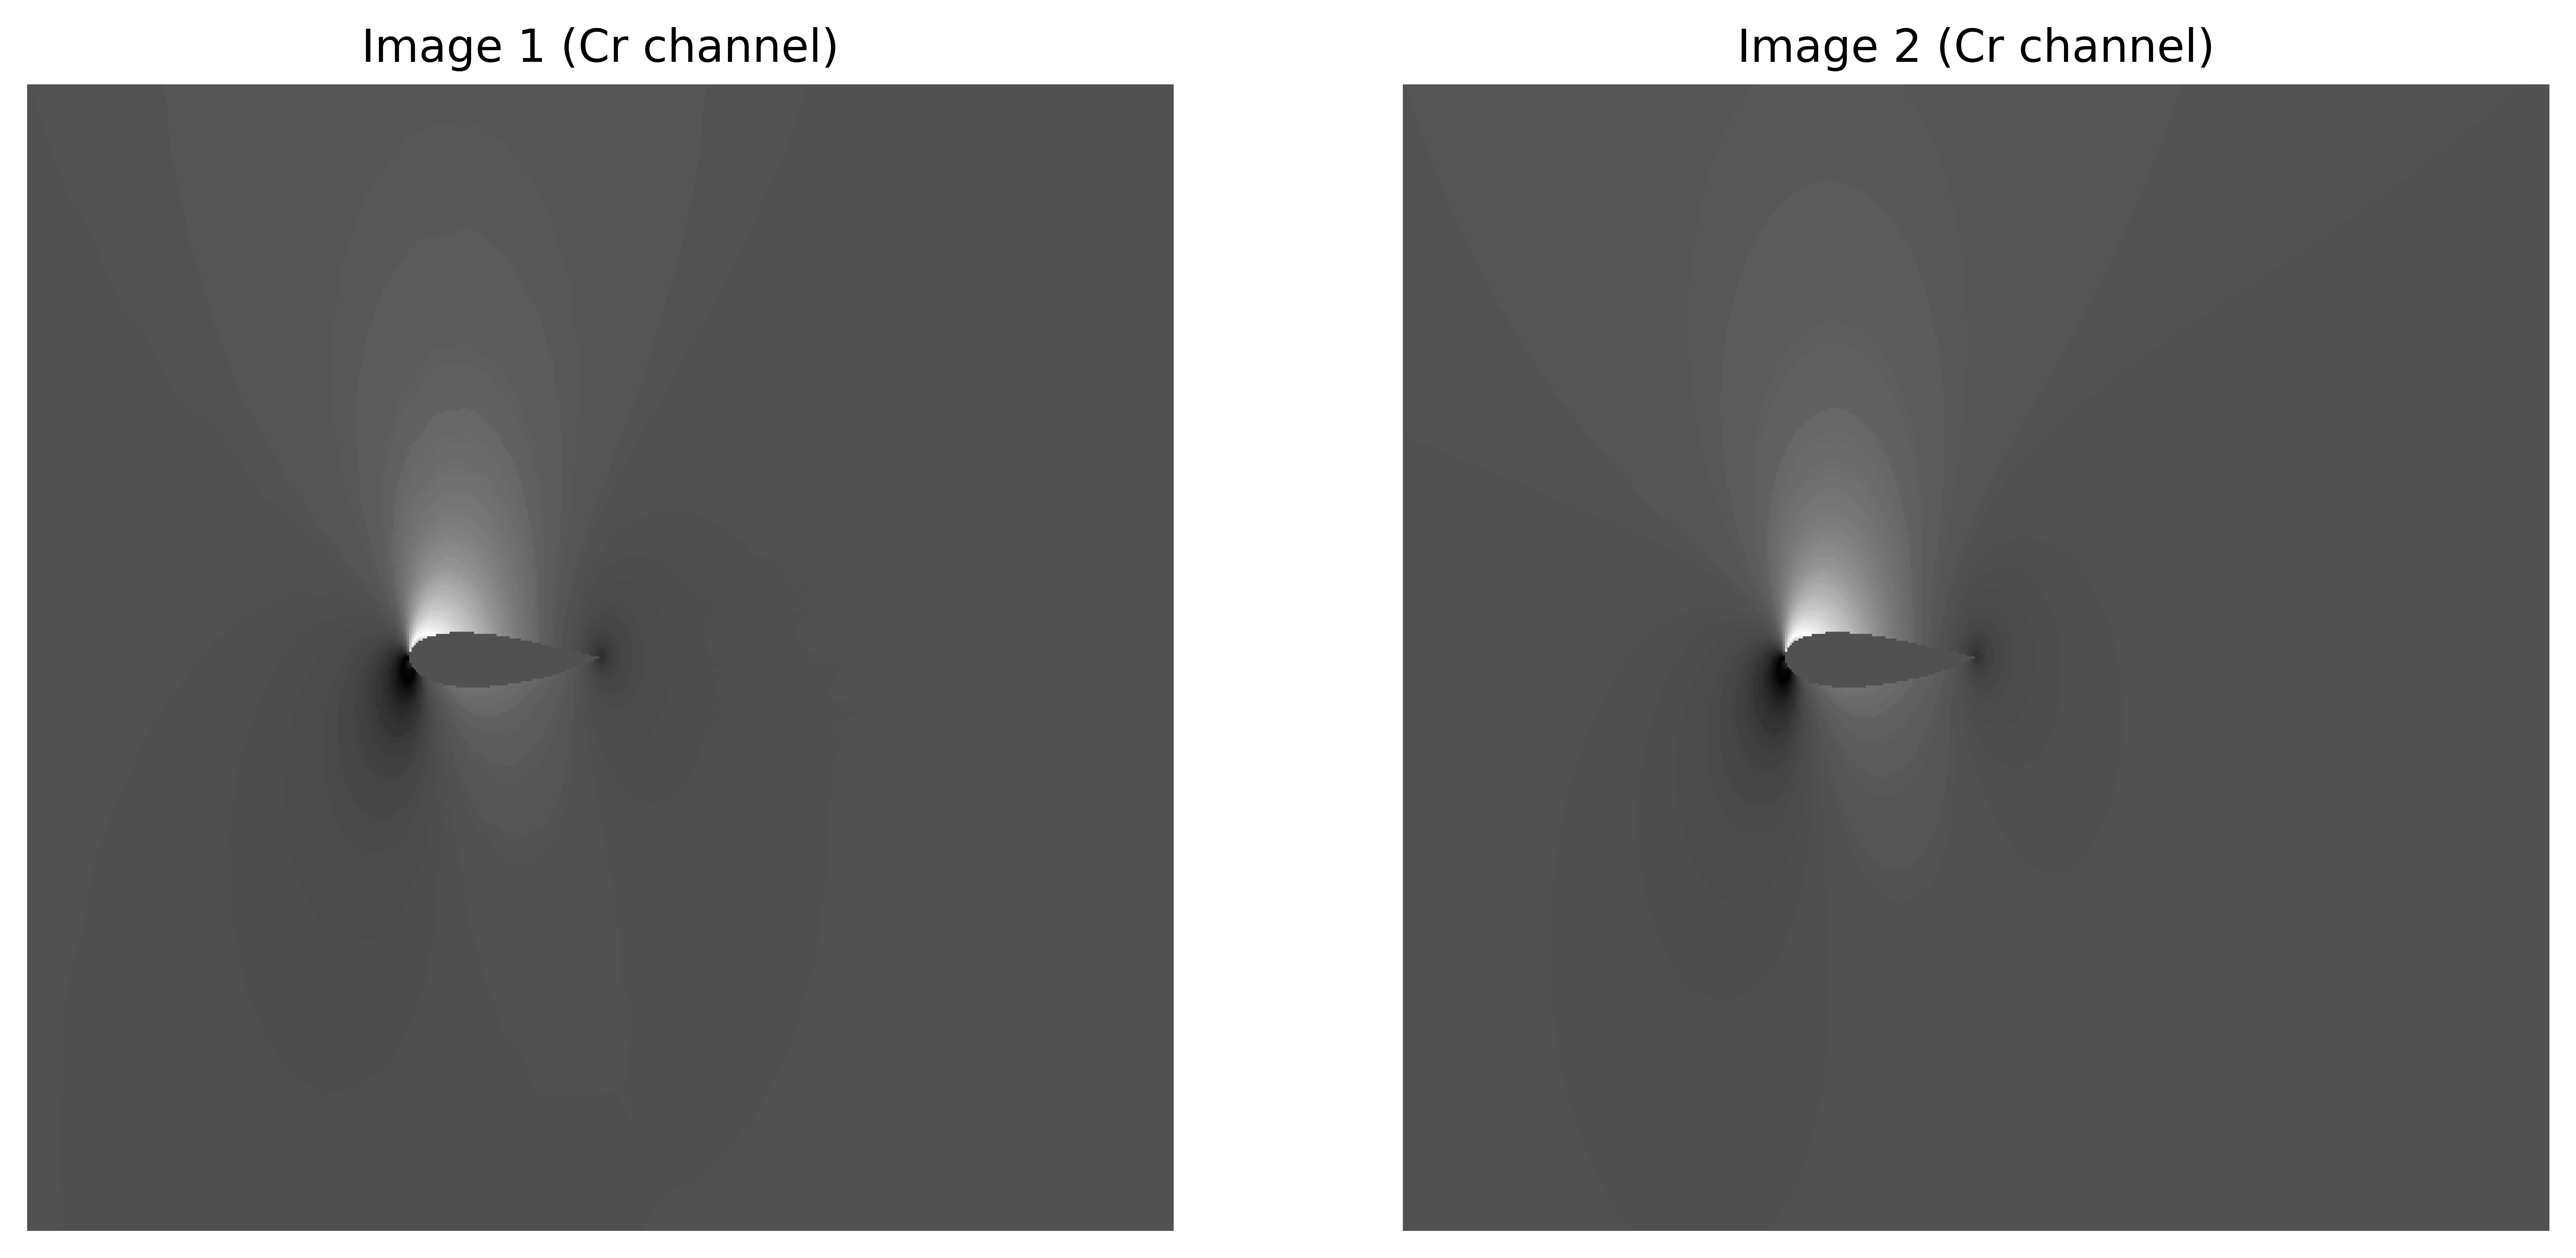

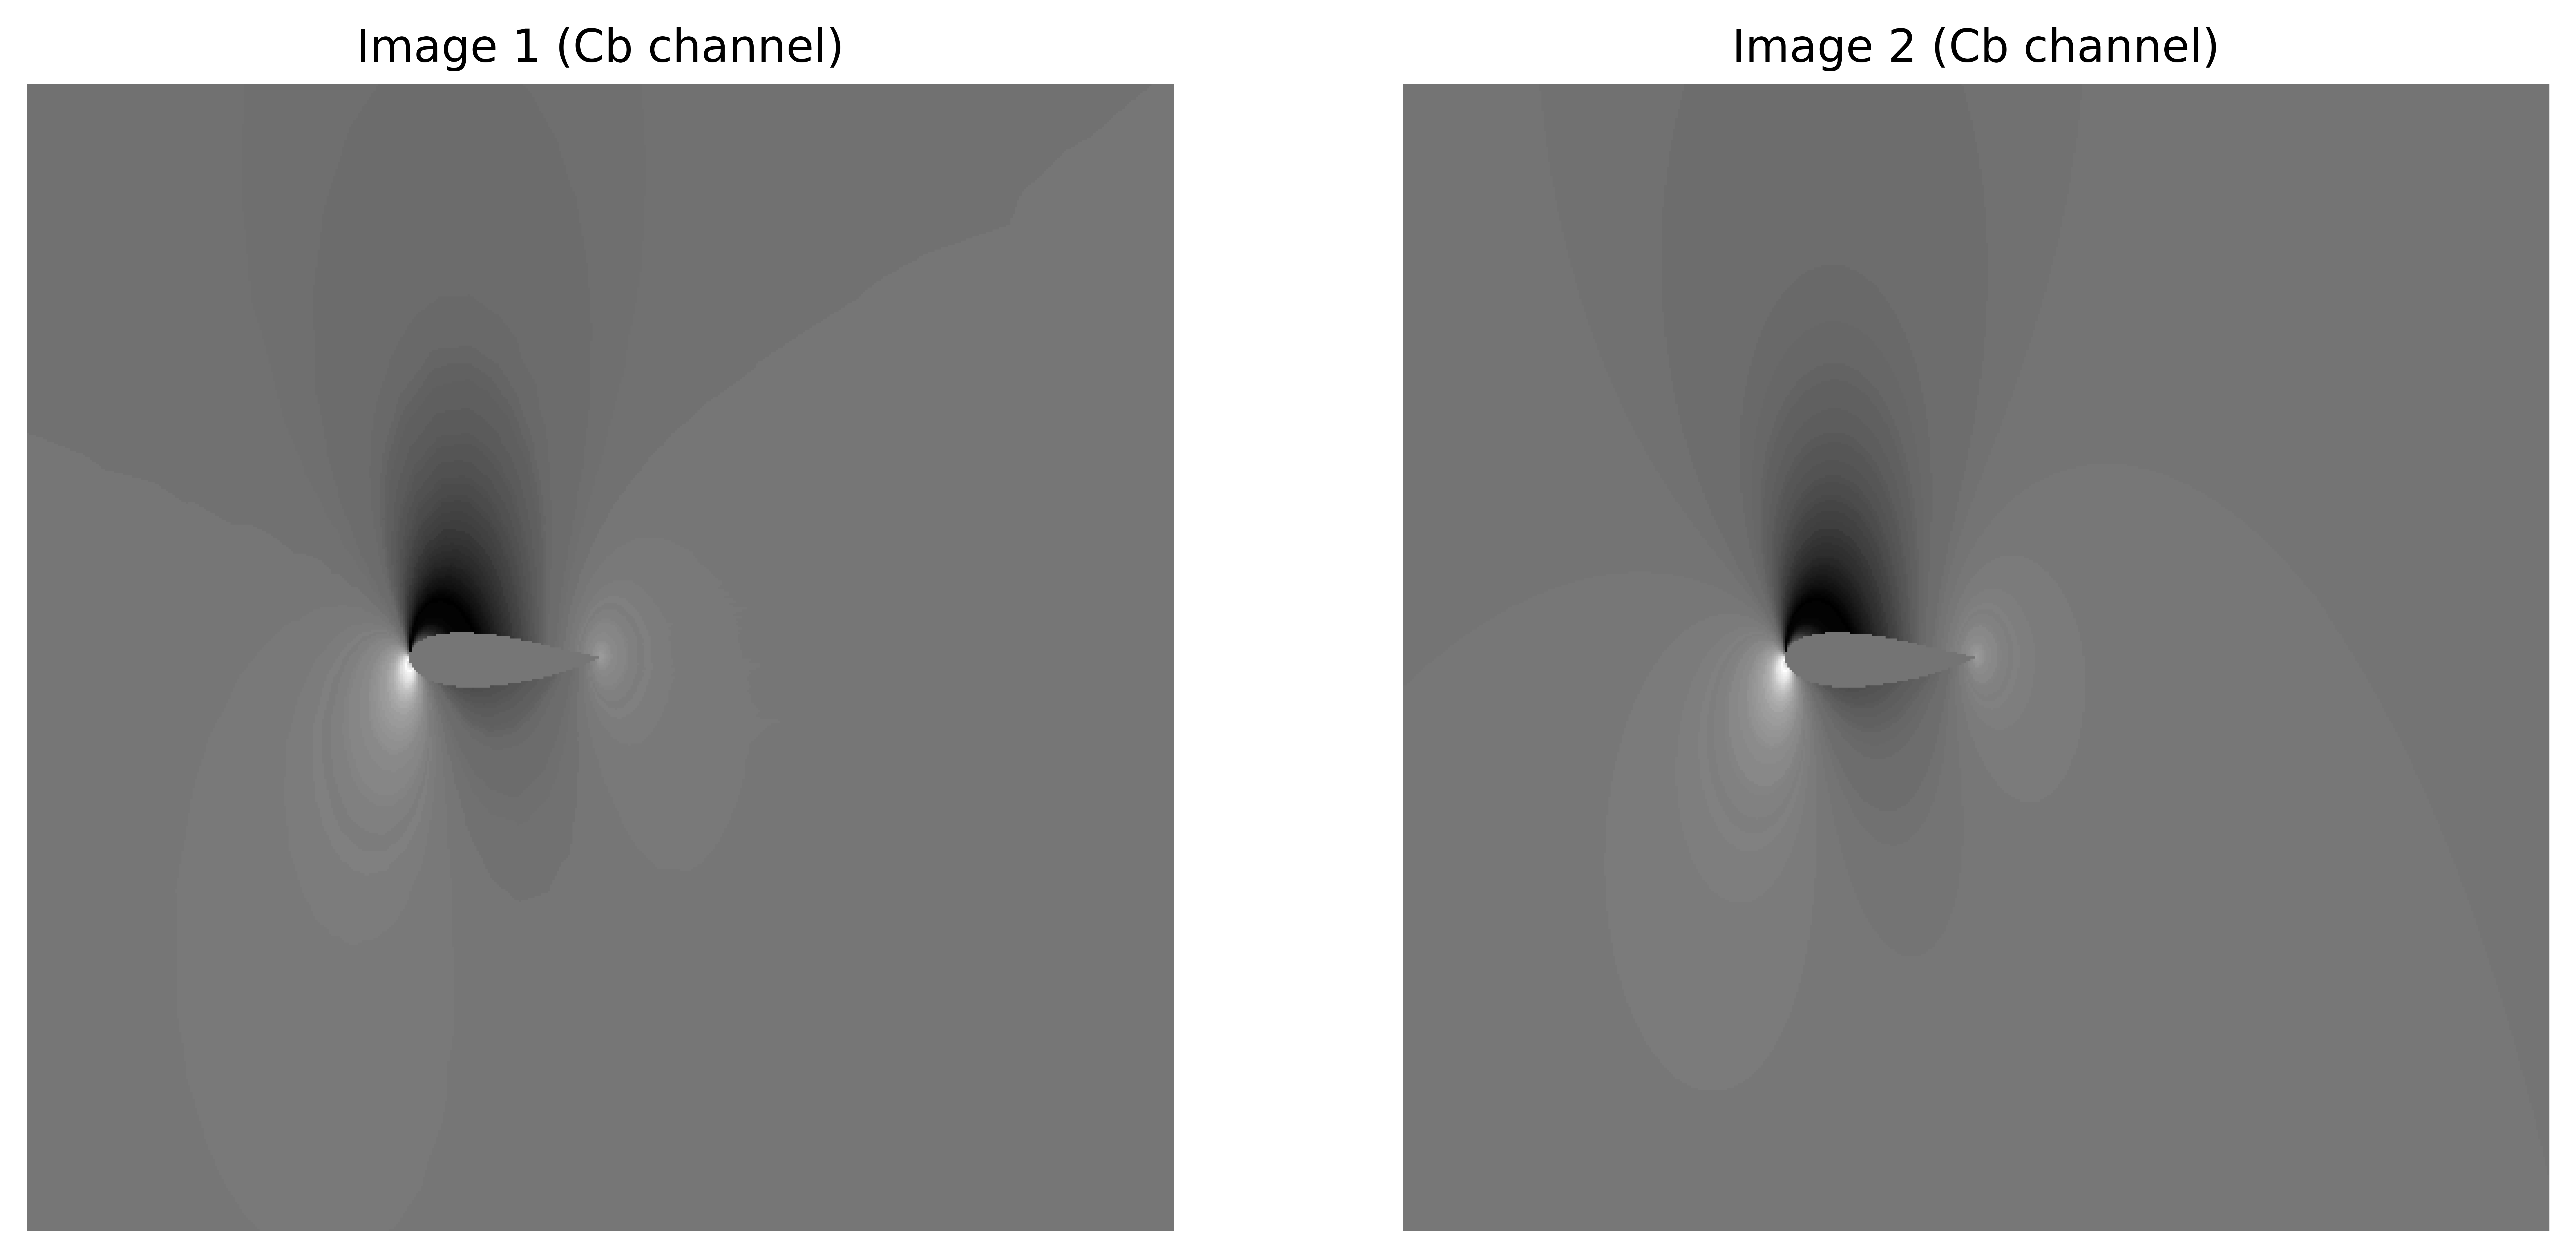

In [17]:
# read image airfRANS_cropped_p.png
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def load_and_display_image(image1path, image2path):
    """
    Load an image from the specified path and display it.
    
    Parameters:
    image_path (str): Path to the image file.
    """
    # Load the images
    image1 = Image.open(image1path)
    image2 = Image.open(image2path)

    # Convert PIL images to numpy arrays (RGB)
    image1_np = np.array(image1)
    image2_np = np.array(image2)

    # Convert RGB to YCrCb color space using OpenCV
    image1_ycrcb = cv2.cvtColor(image1_np, cv2.COLOR_RGB2YCrCb)
    image2_ycrcb = cv2.cvtColor(image2_np, cv2.COLOR_RGB2YCrCb)

    # Crop images: y from 220 to 555, x from 256 to 955
    # image1_ycrcb = image1_ycrcb[220:555, 256:955]
    # image2_ycrcb = image2_ycrcb[220:555, 256:955]

    # Display the original images
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image1_np[220:555, 256:955])
    plt.axis('off')
    plt.title('Image 1 (Original)')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_np[220:555, 256:955])
    plt.axis('off')
    plt.title('Image 2 (Original)')
    plt.show()
    # Display the Y channel only for visualization
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image1_ycrcb[..., 0], cmap='gray')
    plt.axis('off')
    plt.title('Image 1 (Y channel)')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_ycrcb[..., 0], cmap='gray')
    plt.axis('off')
    plt.title('Image 2 (Y channel)')
    plt.show()
    # display the Cr and Cb channels
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image1_ycrcb[..., 1], cmap='gray')
    plt.axis('off')
    plt.title('Image 1 (Cr channel)')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_ycrcb[..., 1], cmap='gray')
    plt.axis('off')
    plt.title('Image 2 (Cr channel)')
    plt.show()
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image1_ycrcb[..., 2], cmap='gray')
    plt.axis('off')
    plt.title('Image 1 (Cb channel)')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_ycrcb[..., 2], cmap='gray')
    plt.axis('off')
    plt.title('Image 2 (Cb channel)')
    plt.show()
    return image1_ycrcb, image2_ycrcb

# read image airfRANS_cropped_p.png
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import os
import cv2
def load_images_from_folder(folder):
    p_arr = []
    ux_arr = []
    uy_arr = [] 
    for samples in os.listdir(folder):
        img_path_dir = os.path.join(folder, samples, 'meshes')
        if not os.path.isdir(img_path_dir):
            continue
        for image_path in os.listdir(img_path_dir):
            img_path = os.path.join(img_path_dir, image_path)
            if os.path.isfile(img_path) and img_path.endswith('.png'):
                filename = os.path.basename(img_path)
                if filename.split('_')[-1] == 'p.png':
                    p_arr.append(img_path)
                elif filename.split('_')[-1] == 'ux.png':
                    ux_arr.append(img_path)
                elif filename.split('_')[-1] == 'uy.png':
                    uy_arr.append(img_path)
                continue 
    return p_arr, ux_arr, uy_arr

data_clipped_path = './AirfRANS_clipped'
data_remeshed_path = './AirfRANS_remeshed'

data_clipped = load_images_from_folder(data_clipped_path)
data_remeshed = load_images_from_folder(data_remeshed_path) 
p_clipped, ux_clipped, uy_clipped = data_clipped
p_remeshed, ux_remeshed, uy_remeshed = data_remeshed

# Load and display the first image pair from clipped data 
# image1, image2 = load_and_display_image(p_clipped[0], p_remeshed[0])
image1, image2 = load_and_display_image('./raw_data_images/clipped_p.png', './raw_data_images/remeshed_p.png')


## Bhattacharyya Distance (CV_COMP_BHATTACHARYYA)
This is often considered one of the most reliable and robust metrics for histogram comparison.

**How it works:** It measures the "overlap" between the two histograms, treating them as probability distributions.

**Range:** 0 to 1.

**Interpretation:**

0: Perfect match.

1: Total mismatch.

**Best for:** General-purpose comparison. It's less sensitive to noise than Chi-Square and often gives more perceptually accurate results about the similarity of two images' lighting and contrast.
The formula is:

BC(P 
1
​
 ,P 
2
​
 )= 
i=0
∑
N−1
​
  P 
1
​
 (i)⋅P 
2
​
 (i)

​
 
Where:

N is the number of bins in the histogram (e.g., 256 for an 8-bit grayscale image).

P 
1
​
 (i) is the normalized value of the i-th bin of the first histogram.

P 
2
​
 (i) is the normalized value of the i-th bin of the second histogram.

Bhattacharyya distance for Y channel: 0.1703
Bhattacharyya distance for Cr channel: 0.1345
Bhattacharyya distance for Cb channel: 0.1561
Average Bhattacharyya distance across all channels: 0.1536


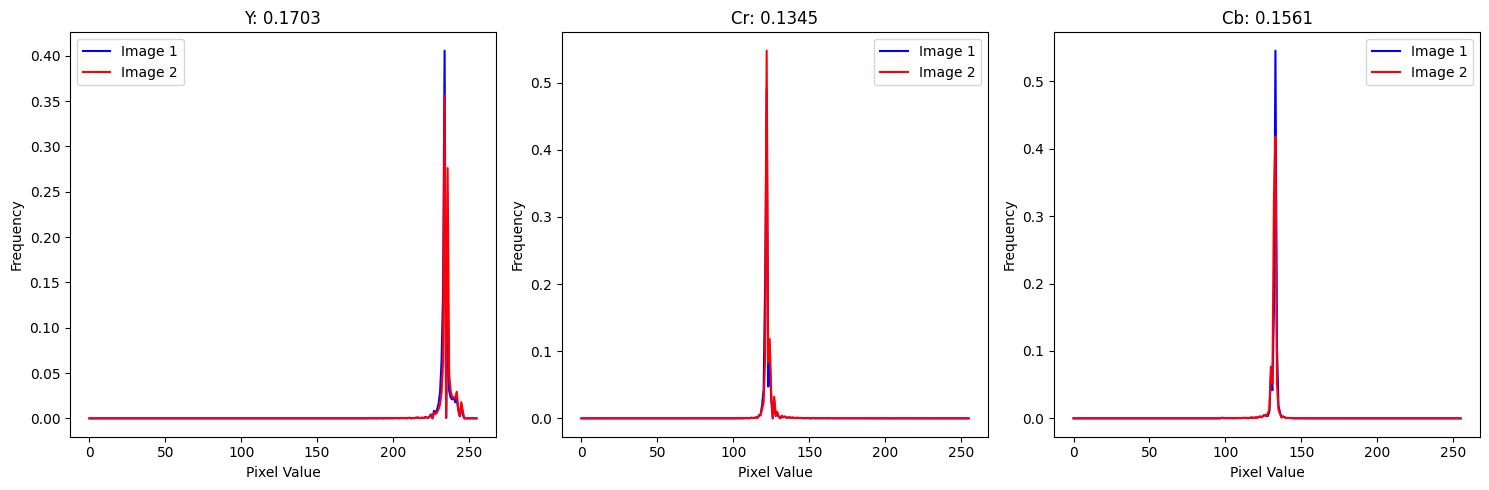

In [ ]:
def calculate_bhattacharyya_from_scratch(hist1, hist2):
    """
    Calculates the Bhattacharyya distance between two histograms from scratch.
    
    Args:
        hist1 (np.array): The first histogram.
        hist2 (np.array): The second histogram.
        
    Returns:
        float: The Bhattacharyya distance.
    """
    # 1. Normalize the histograms to make them probability distributions.
    # We add a small epsilon (1e-10) to avoid division by zero if a histogram is all zeros.
    p1 = hist1 / (hist1.sum() + 1e-10)
    p2 = hist2 / (hist2.sum() + 1e-10)
    
    # 2. Calculate the Bhattacharyya Coefficient.
    # This is the sum of the square root of the product of corresponding bins.
    bhattacharyya_coefficient = np.sum(np.sqrt(p1 * p2))
    
    # 3. Calculate the Bhattacharyya Distance.
    # Handle potential floating point inaccuracies where the coefficient might be slightly > 1.
    coefficient = np.clip(bhattacharyya_coefficient, 0.0, 1.0)
    bhattacharyya_distance = np.sqrt(1 - coefficient)
    
    return bhattacharyya_distance

# calculate histograms for all channels
def calculate_histograms(image1, image2):
    """
    Calculate histograms for all channels of two images.
    
    Parameters:
    image1 (np.array): First image in YCrCb color space.
    image2 (np.array): Second image in YCrCb color space.
    
    Returns:
    dict: Histograms for each channel.
    """
    histograms = {}
    
    # Calculate histograms for each channel
    for i, channel in enumerate(['Y', 'Cr', 'Cb']):
        hist1, _ = np.histogram(image1[..., i], bins=256, range=(0, 256))
        hist2, _ = np.histogram(image2[..., i], bins=256, range=(0, 256))
        
        # Normalize the histograms
        hist1 = hist1 / np.sum(hist1)
        hist2 = hist2 / np.sum(hist2)
        
        # Store the histograms
        histograms[channel] = (hist1, hist2)
    
    return histograms

# Calculate histograms for the YCrCb channels
histograms = calculate_histograms(image1, image2)
# plot comparitive histograms

def plot_histograms(histograms, scores):
    """
    Plot histograms for each channel.
    
    Parameters:
    histograms (dict): Histograms for each channel.
    """
    plt.figure(figsize=(15, 5))
    
    for i, (channel, (hist1, hist2)) in enumerate(histograms.items()):
        plt.subplot(1, 3, i + 1)
        plt.plot(hist1, color='blue', label='Image 1')
        plt.plot(hist2, color='red', label='Image 2')
        plt.title(f'{channel}: {scores[channel]:.4f}')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
# Calculate Bhattacharyya distance for each channel
bhattacharyya_distances = {}
for channel, (hist1, hist2) in histograms.items():
    distance = calculate_bhattacharyya_from_scratch(hist1, hist2)
    bhattacharyya_distances[channel] = distance 
    print(f"Bhattacharyya distance for {channel} channel: {distance:.4f}")
# combined average Bhattacharyya distance
average_distance = np.mean(list(bhattacharyya_distances.values()))
print(f"Average Bhattacharyya distance across all channels: {average_distance:.4f}")

plot_histograms(histograms, bhattacharyya_distances)


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def compute_gradient_and_plot(masked_img):
    """
    Compute the gradient of the masked image and plot the gradient magnitude and direction.
    
    Parameters:
    masked_img (numpy.ndarray): The masked image array.
    """
    # Compute gradients
    gx, gy = np.gradient(masked_img[..., 2])

    # Compute gradient magnitude
    grad_mag = np.sqrt(gx**2 + gy**2) 

    # calculate the gradient direction
    grad_dir = np.arctan2(gy, gx)

    return grad_mag, grad_dir
grad_mag, grad_dir = compute_gradient_and_plot(image1)
grad_mag2, grad_dir2 = compute_gradient_and_plot(image2)

# plot the all the images
fig, axes = plt.subplots(2, 2, figsize=(15, 3 * 2), dpi=1000)
axes[0, 0].imshow(grad_dir, cmap='gray')
axes[0, 0].set_title('Image 1')
axes[0, 0].axis('off')
axes[0, 1].imshow(grad_dir2, cmap='gray')
axes[0, 1].set_title('Image 2')
axes[0, 1].axis('off')
axes[1, 0].imshow(grad_mag, cmap='gray')
axes[1, 0].set_title('Gradient Magnitude Image 1')
axes[1, 0].axis('off')
axes[1, 1].imshow(grad_mag2, cmap='gray')
axes[1, 1].set_title('Gradient Magnitude Image 2')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()



Number of unique values in the image: 144
Unique values in normalized image array: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Number of unique values in the image: 142
Unique values in normalized image array: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Number of unique values in the image: 113
Unique values in normalized image array: [0.3 0.4 0.5 0.6 0.7 0.8]
Number of unique values in the image: 112
Unique values in normalized image array: [0.3 0.4 0.5 0.6 0.7 0.8]
Number of unique values in the image: 78
Unique values in normalized image array: [0.4 0.5 0.6 0.7]
Number of unique values in the image: 77
Unique values in normalized image array: [0.4 0.5 0.6 0.7]


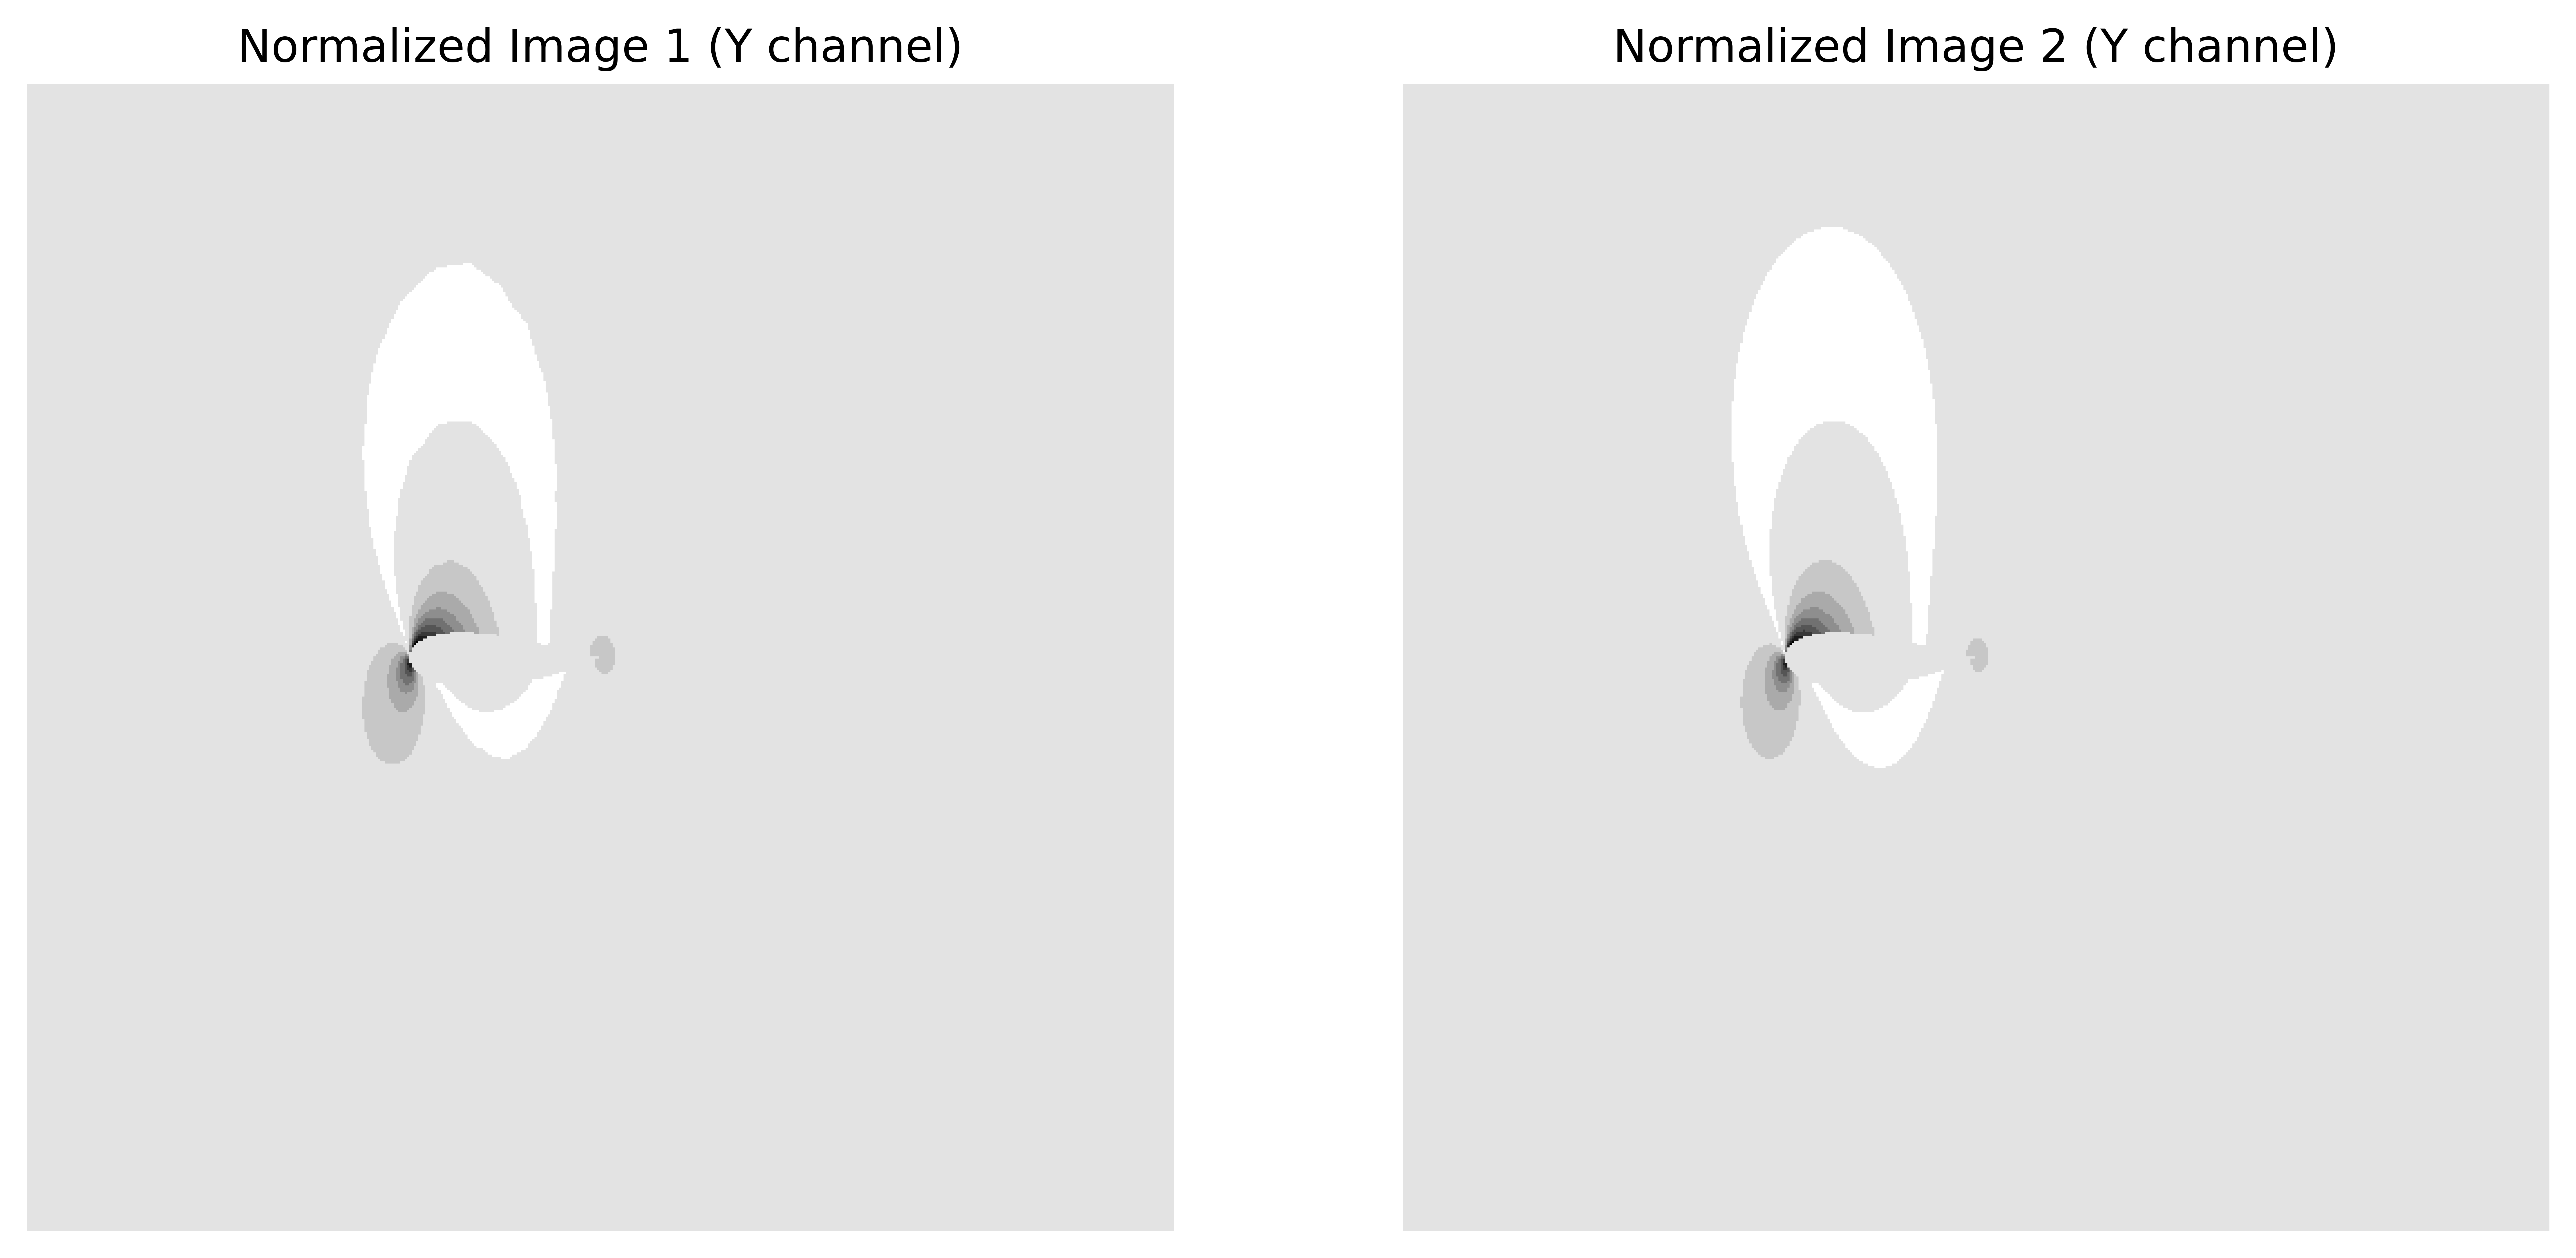

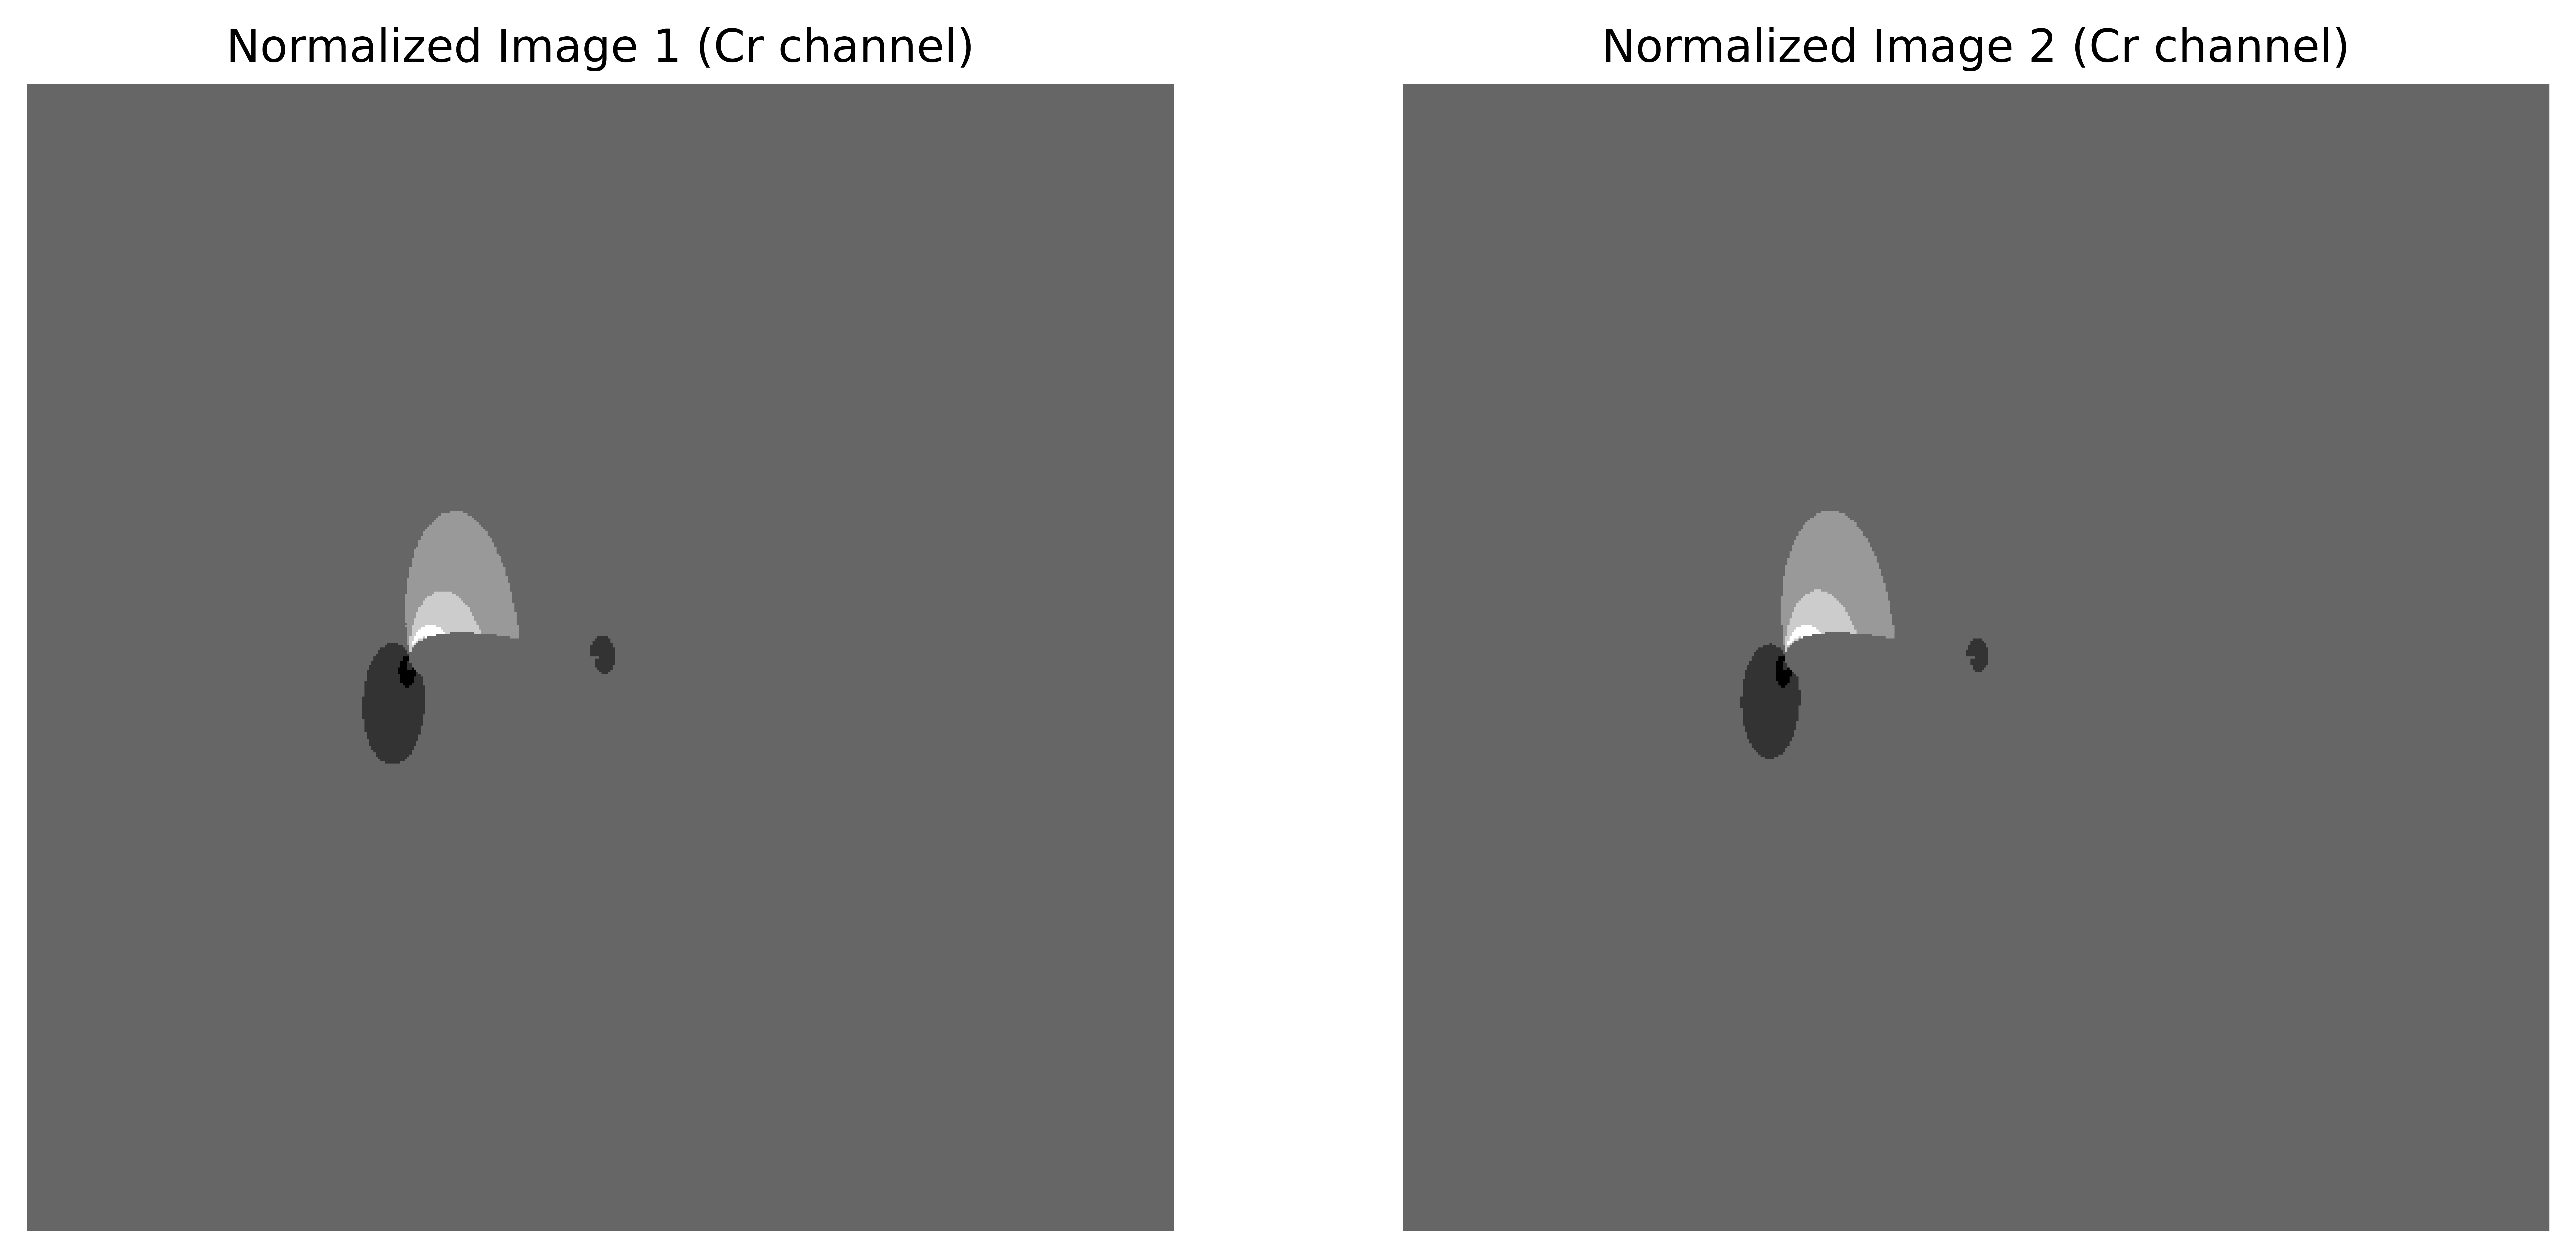

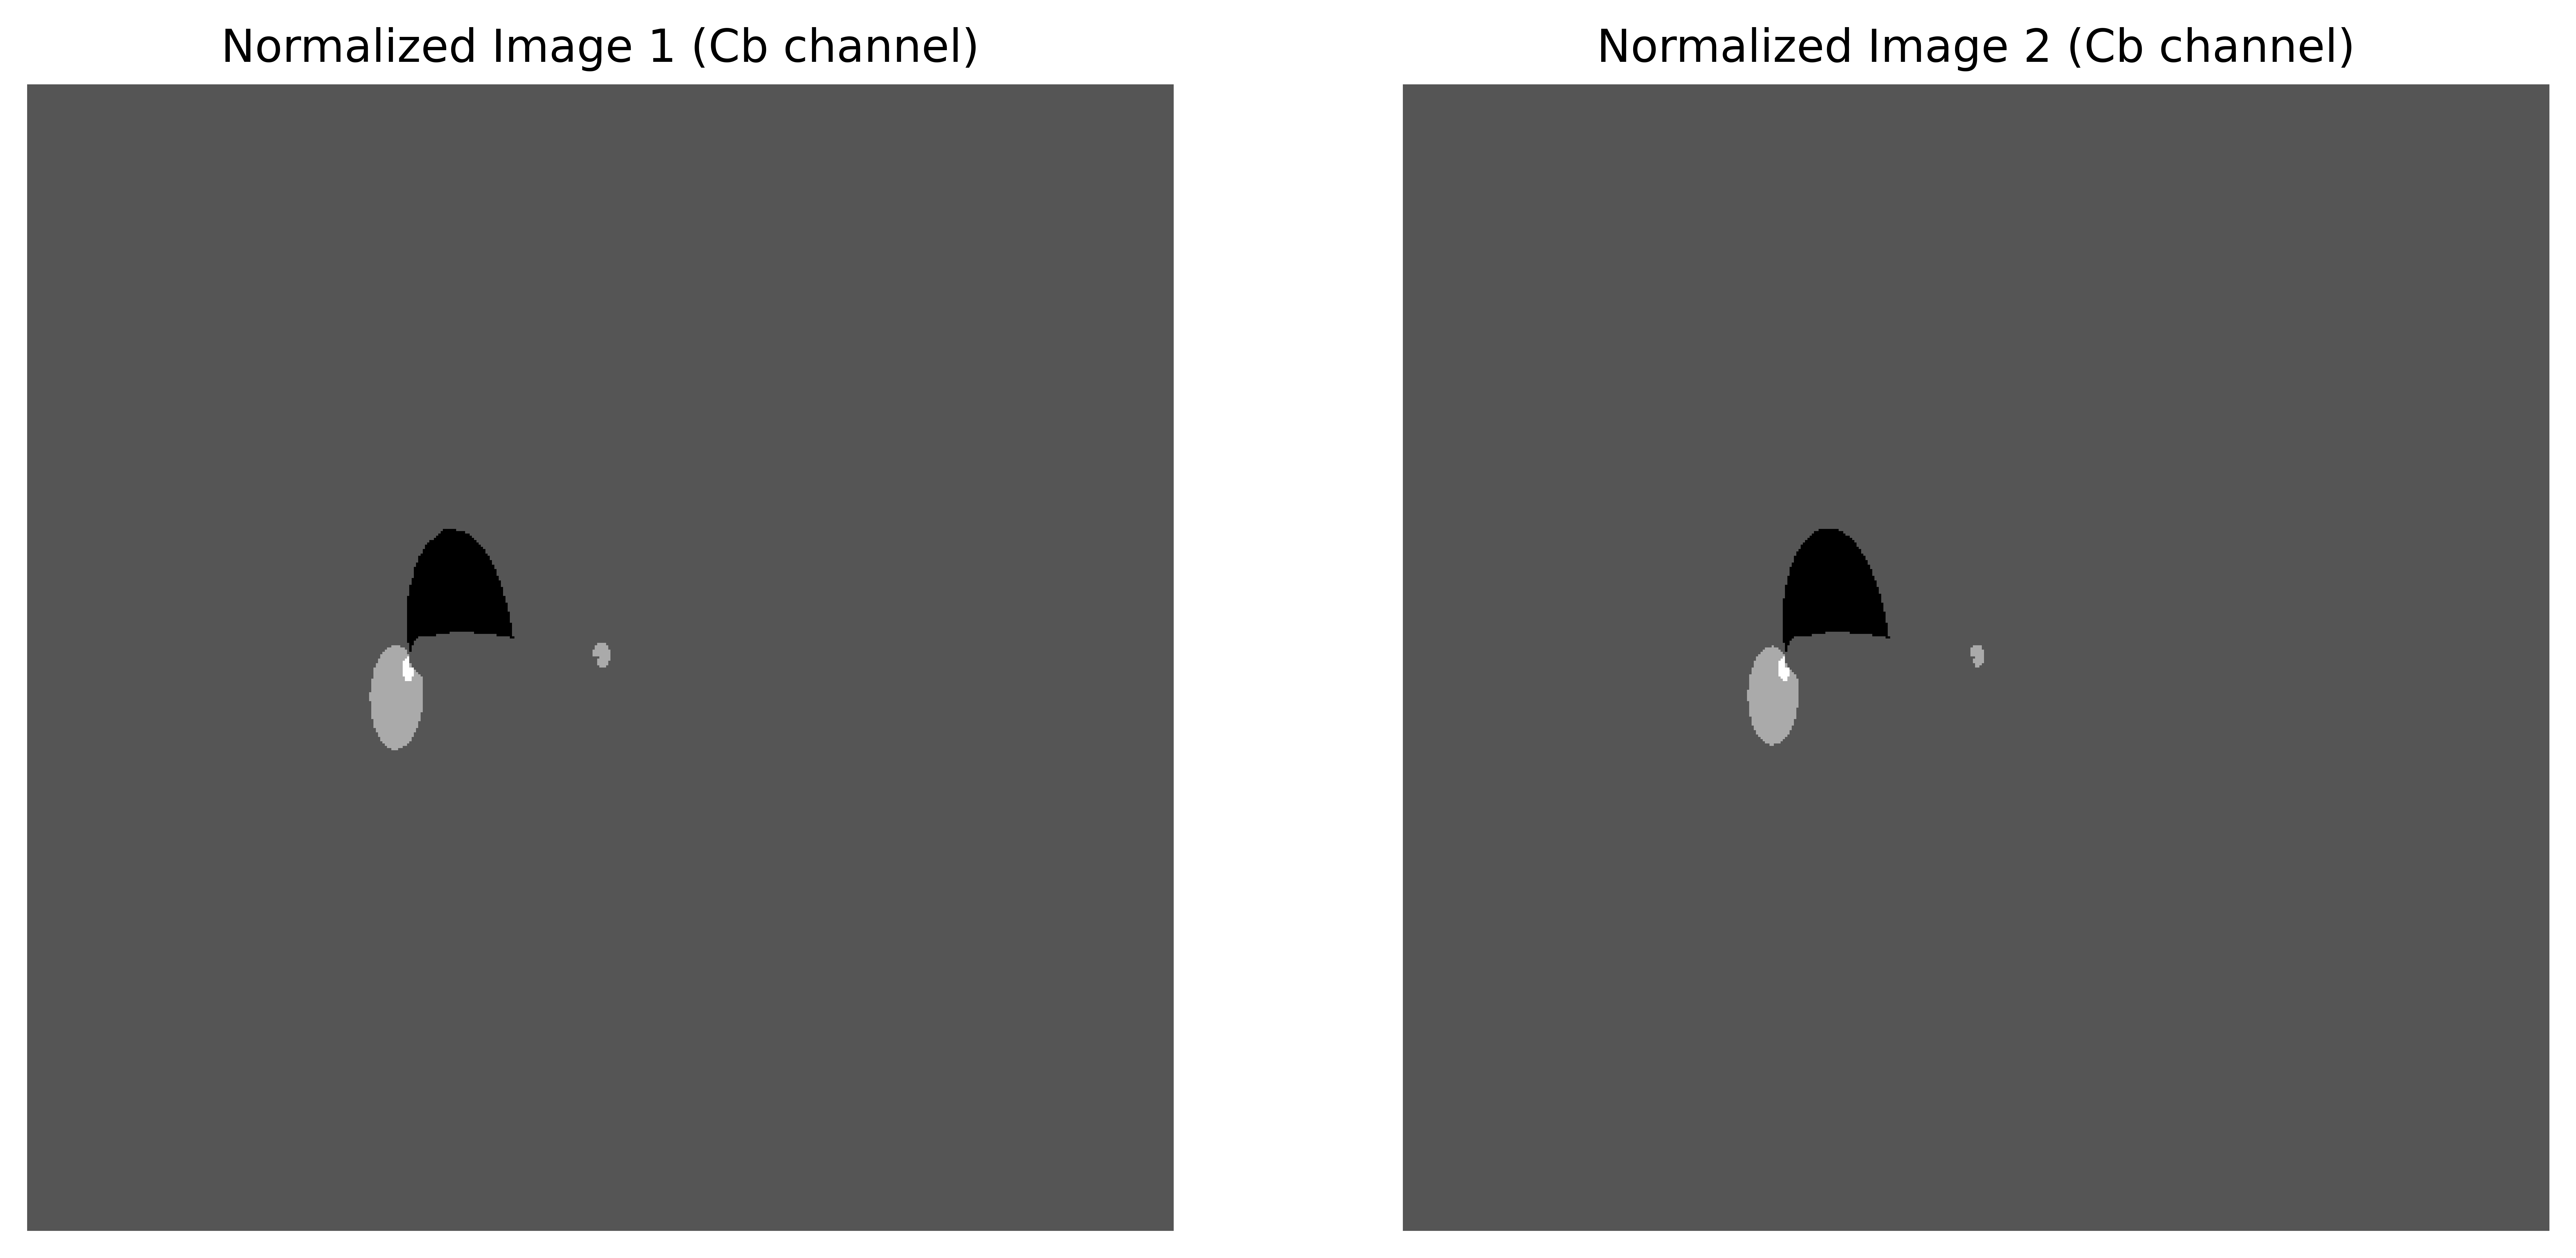

In [20]:

def unique_values_in_normalized_image(masked_img):
    """
    Get the number of unique values in the masked image and normalize it.
    
    Parameters:
    masked_img (numpy.ndarray): The masked image array.
    
    Returns:
    normalized_image_array (numpy.ndarray): Normalized image array with values rounded to 2 decimal places.
    """
    # from image_array get number of unique values 
    unique_values = np.unique(masked_img)
    print(f'Number of unique values in the image: {len(unique_values)}') 
    
    # convert 0 - 255 to 0 - 1
    normalized_image_array = masked_img / 255.0
    
    # round to 2 decimal places
    normalized_image_array = np.round(normalized_image_array, 1)
    
    print(f'Unique values in normalized image array: {np.unique(normalized_image_array)}')
    
    return normalized_image_array

normalized_image1_y = unique_values_in_normalized_image(image1[..., 0])
normalized_image2_y = unique_values_in_normalized_image(image2[..., 0])

normalized_image1_cr = unique_values_in_normalized_image(image1[..., 1])
normalized_image2_cr = unique_values_in_normalized_image(image2[..., 1])

normalized_image1_cb = unique_values_in_normalized_image(image1[..., 2])
normalized_image2_cb = unique_values_in_normalized_image(image2[..., 2])
 
# Display the normalized images
plt.figure(figsize=(12, 12), dpi=1000)
plt.subplot(1, 2, 1)
plt.imshow(normalized_image1_y, cmap='gray')
plt.axis('off')
plt.title('Normalized Image 1 (Y channel)')
plt.subplot(1, 2, 2)
plt.imshow(normalized_image2_y, cmap='gray')
plt.axis('off')
plt.title('Normalized Image 2 (Y channel)')
plt.show()

# Display the normalized images
plt.figure(figsize=(12, 12), dpi=1000)
plt.subplot(1, 2, 1)
plt.imshow(normalized_image1_cr, cmap='gray')
plt.axis('off')
plt.title('Normalized Image 1 (Cr channel)')
plt.subplot(1, 2, 2)
plt.imshow(normalized_image2_cr, cmap='gray')
plt.axis('off')
plt.title('Normalized Image 2 (Cr channel)')
plt.show()

plt.figure(figsize=(12, 12), dpi=1000)
plt.subplot(1, 2, 1)
plt.imshow(normalized_image1_cb, cmap='gray')
plt.axis('off')
plt.title('Normalized Image 1 (Cb channel)')
plt.subplot(1, 2, 2)
plt.imshow(normalized_image2_cb, cmap='gray')
plt.axis('off')
plt.title('Normalized Image 2 (Cb channel)')
plt.show()

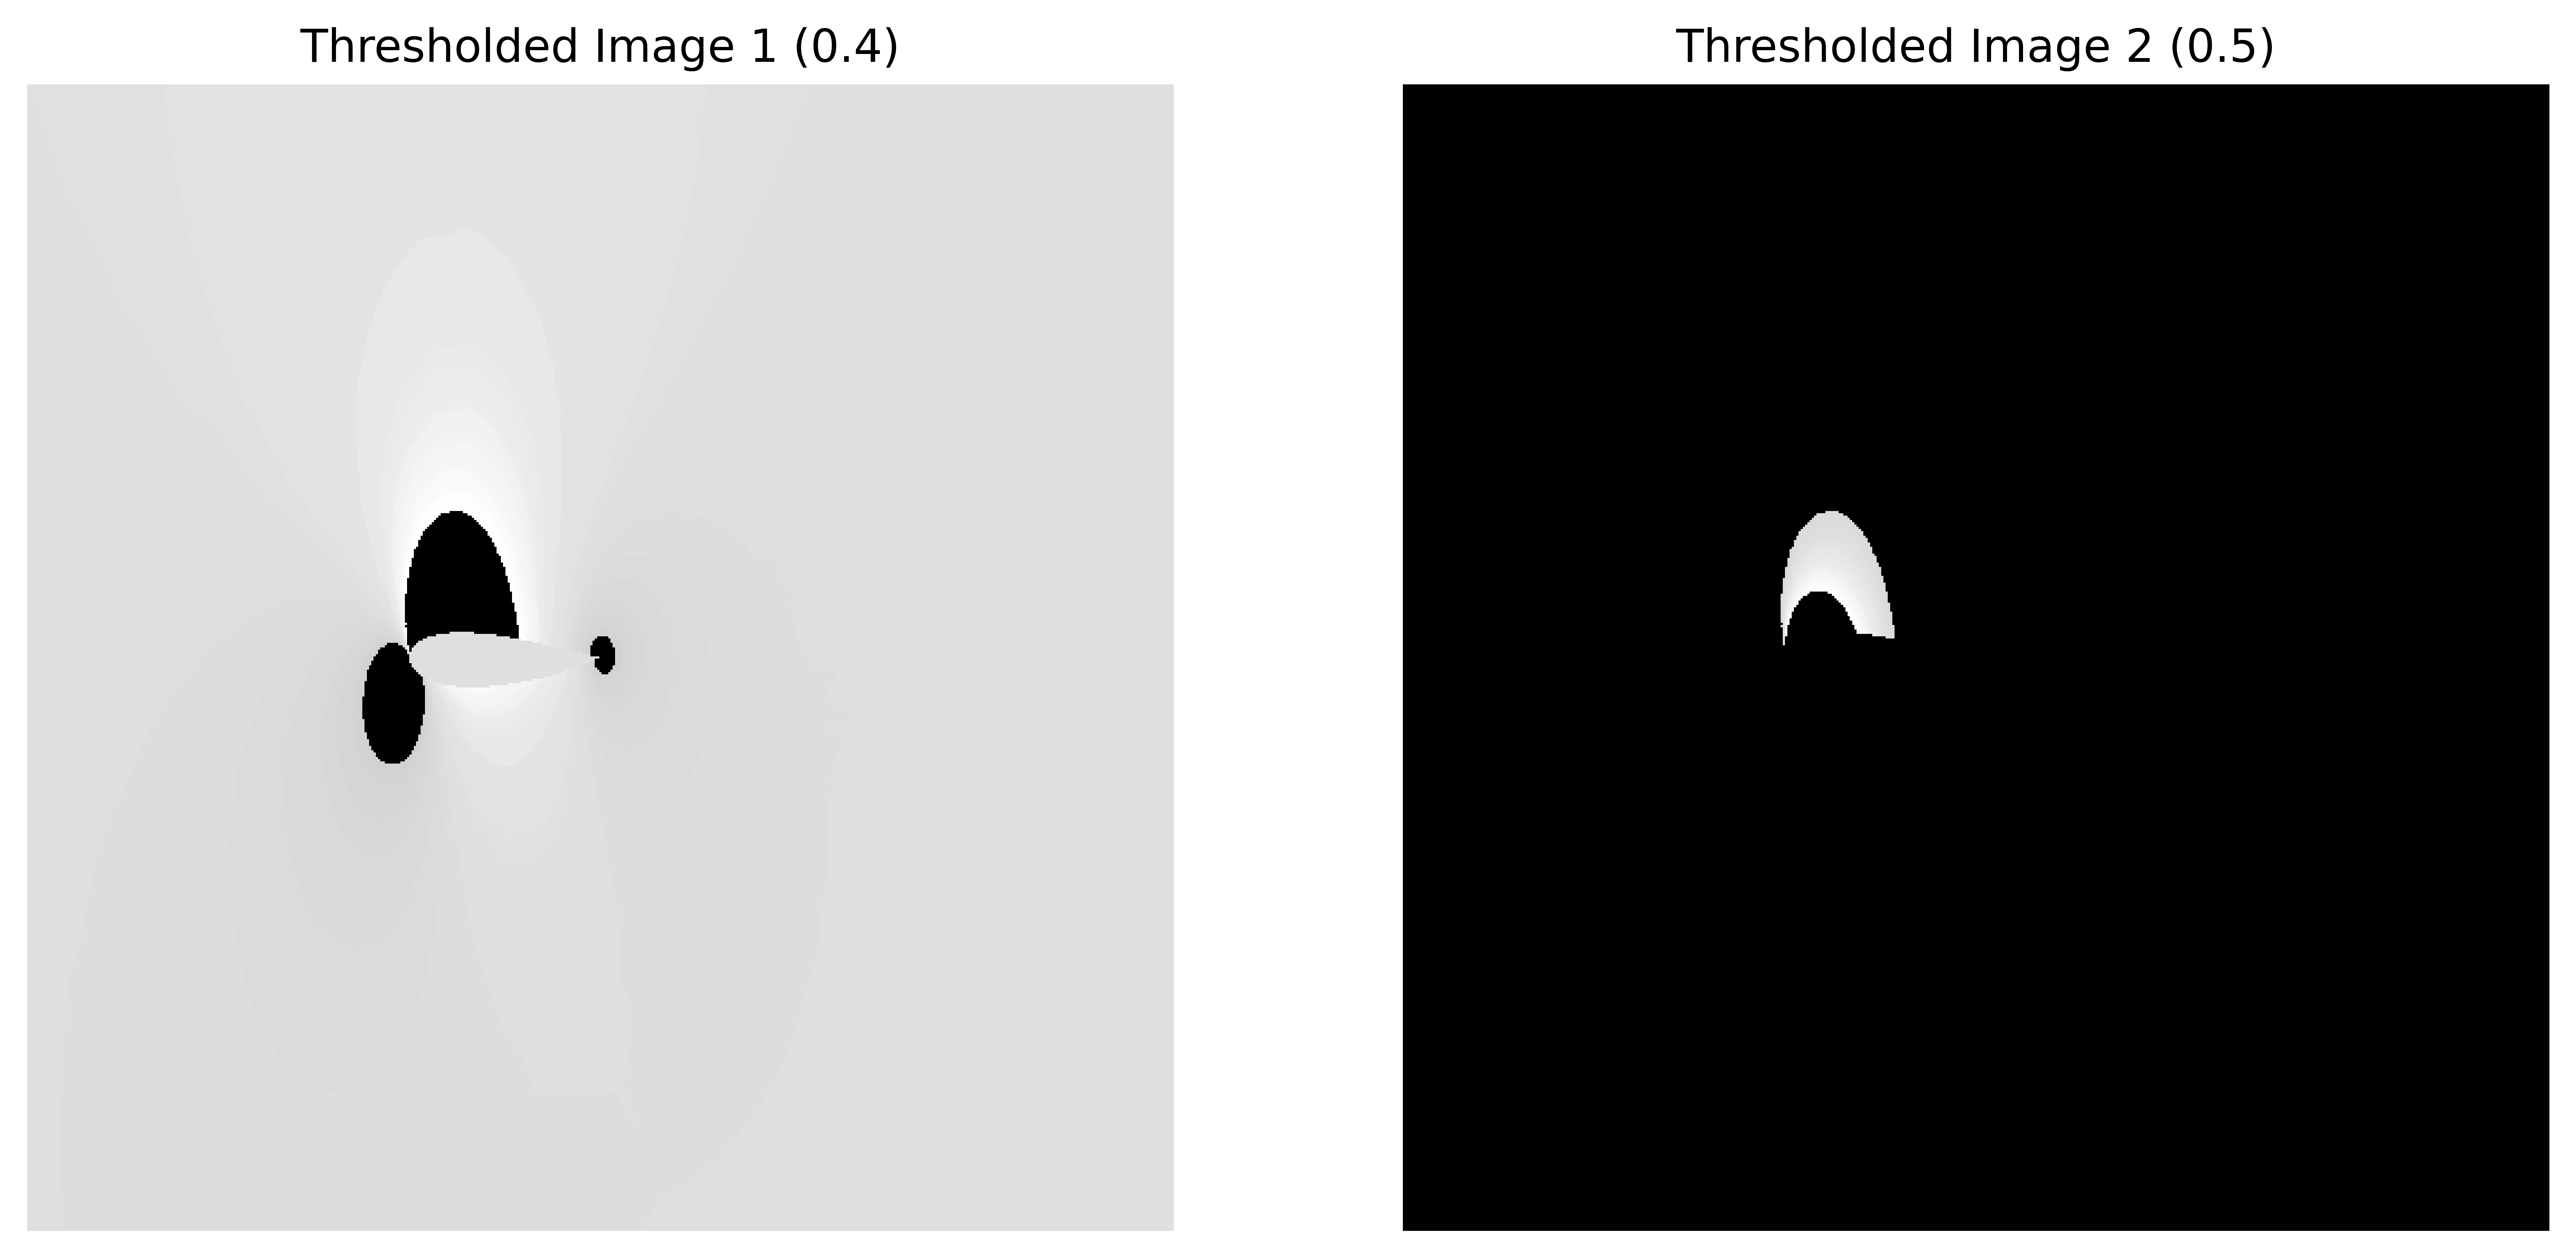

In [ ]:
# display only 0.5 thresholded images masked_img form normalized_image1_cr.copy()
mask1 = normalized_image1_cr.copy() == 0.4
mask2 = normalized_image1_cr.copy() == 0.5
thresholded_image1 = np.zeros_like(image1[..., 1])  # Initialize with zeros (or ones, as needed)
thresholded_image2 = np.zeros_like(image1[..., 1])  # Initialize with zeros (or ones, as needed)
thresholded_image1[mask1] = image1[..., 1][mask1]
thresholded_image2[mask2] = image1[..., 1][mask2]

# Display the thresholded images
plt.figure(figsize=(12, 12), dpi=1000)
plt.subplot(1, 2, 1)
plt.imshow(thresholded_image1, cmap='gray')
plt.axis('off')
plt.title('Thresholded Image 1 (0.4)')
plt.subplot(1, 2, 2)    
plt.imshow(thresholded_image2, cmap='gray')
plt.axis('off')
plt.title('Thresholded Image 2 (0.5)')
plt.show()


Number of unique values in the normalized image: 6
Number of unique values in the normalized image: 6
Bhattacharyya Score: 0.0435
Bhattacharyya Score: 0.0392
Bhattacharyya Score: 0.0399
Bhattacharyya Score: 0.0183
Bhattacharyya Score: 0.0347
Bhattacharyya Score: 0.1052
Average Bhattacharyya Score: 0.0468


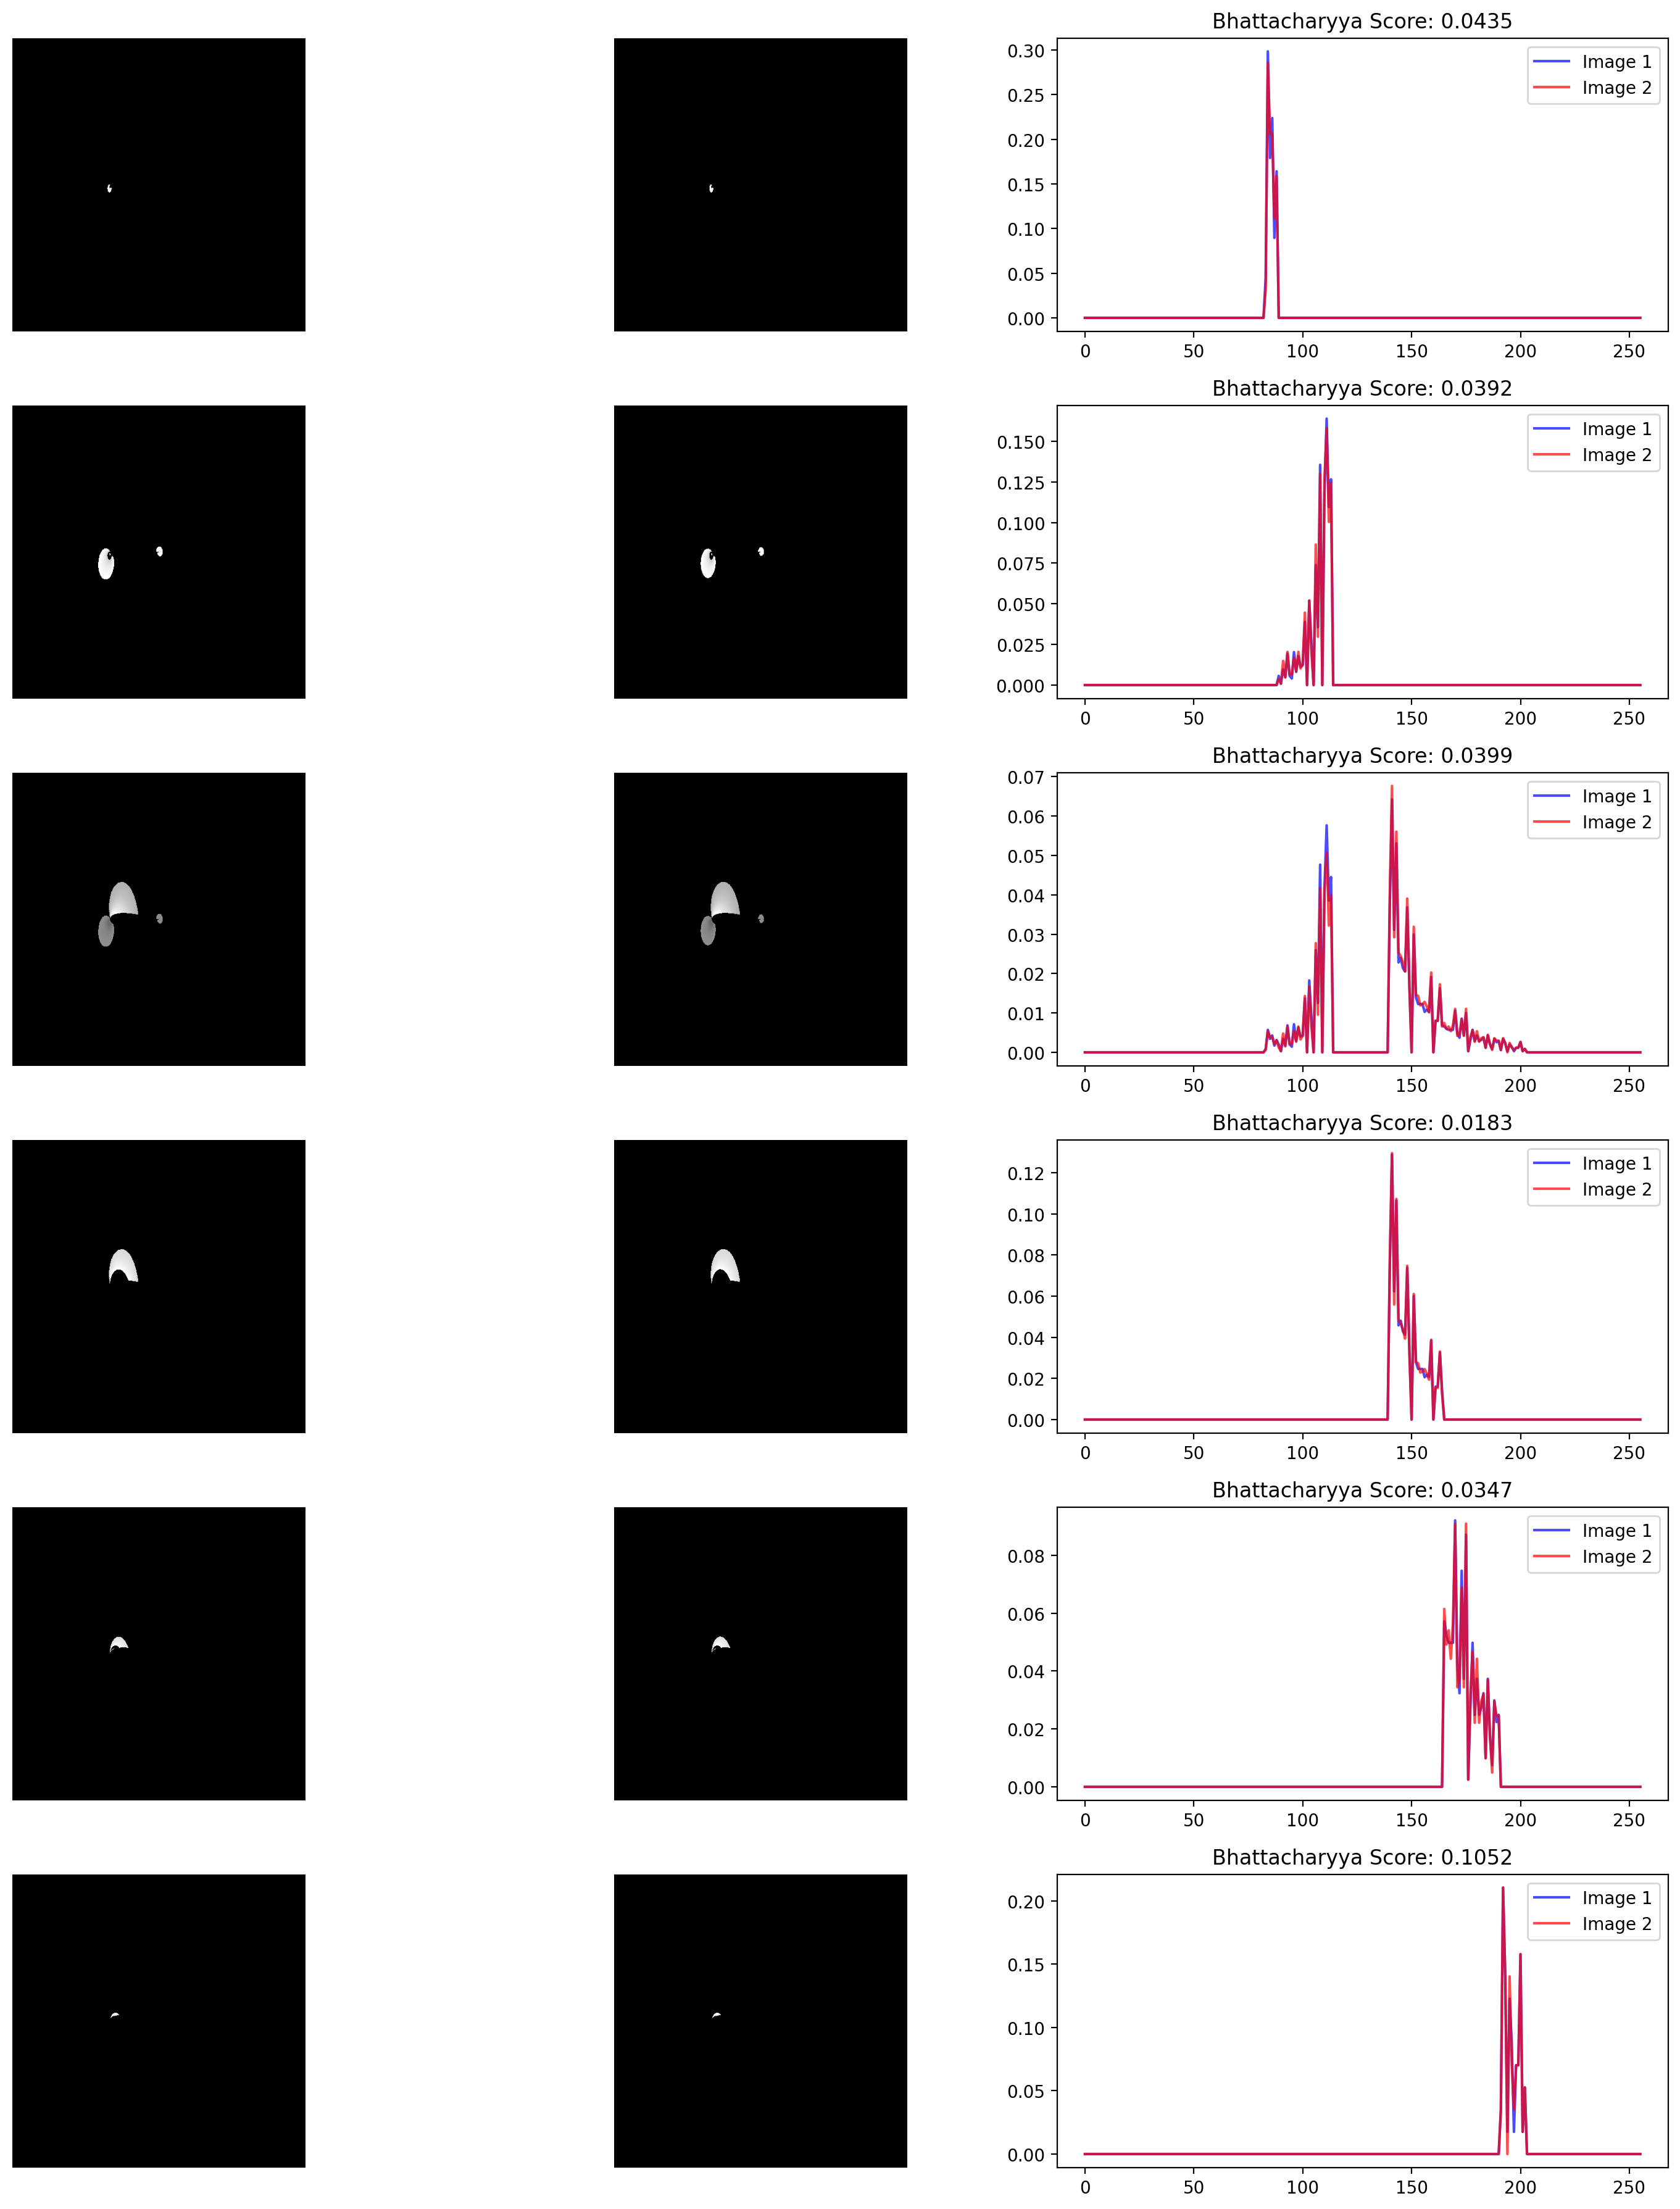

In [ ]:

def threshold_images(normalized_image, original_image):
    """ 
    create thresholded masks for each unique value in the normalized image.
    Parameters:
    normalized_image (numpy.ndarray): The normalized image array.
    """
    unique_values = np.unique(normalized_image)
    print(f'Number of unique values in the normalized image: {len(unique_values)}')
    images = []
    for value in unique_values:
        # create a mask for the current unique value
        mask = normalized_image == value

        # create a new image with all ones (or zeros, as needed)
        thresholded_image = np.zeros_like(original_image)
        if value == 0.5: 
            thresholded_image[~mask] = original_image[~mask]
        else:
            thresholded_image[mask] = original_image[mask] 

        # append the thresholded image to the list
        images.append(thresholded_image)
    return images

thresholded_images1 = threshold_images(normalized_image1_cr.copy(), image1[..., 1].copy())
thresholded_images2 = threshold_images(normalized_image2_cr.copy(), image2[..., 1].copy())

scores = []
# compare the thresholded images with larger figure size
fig, axes = plt.subplots(len(thresholded_images1), 3, figsize=(15, 3 * len(thresholded_images1)), dpi=200)
for i, (img1, img2) in enumerate(zip(thresholded_images1, thresholded_images2)): 
    # use the mask to display original images
    axes[i, 0].imshow(img1, cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 1].imshow(img2, cmap='gray')
    axes[i, 1].axis('off')
    
    # Filter out zero values before creating histograms
    img1_nonzero = img1[img1 != 0]
    img2_nonzero = img2[img2 != 0]

    # Check if there are non-zero pixels to avoid errors with empty arrays
    if img1_nonzero.size > 0 and img2_nonzero.size > 0:
        hist_data = np.histogram(img1_nonzero.ravel(), bins=256, range=(1, 256))
        hist_data2 = np.histogram(img2_nonzero.ravel(), bins=256, range=(1, 256))
        
        # normalize the histograms
        hist_data = hist_data[0] / np.sum(hist_data[0])
        hist_data2 = hist_data2[0] / np.sum(hist_data2[0])
        
        # compare Histograms of the thresholded images overlap 
        axes[i, 2].plot(hist_data, alpha=0.7, color='blue', label='Image 1')
        axes[i, 2].plot(hist_data2, alpha=0.7, color='red', label='Image 2')
        
        score = calculate_bhattacharyya_from_scratch(hist_data, hist_data2)
        scores.append(score)
        axes[i, 2].set_title(f'Bhattacharyya Score: {score:.4f}')
        axes[i, 2].legend()
        print(f'Bhattacharyya Score: {score:.4f}')
    else:
        axes[i, 2].text(0.5, 0.5, 'No non-zero pixels', ha='center', va='center')
        axes[i, 2].set_title('Empty Histogram')

average_score = np.mean(scores)
print(f'Average Bhattacharyya Score: {average_score:.4f}')
plt.tight_layout()
plt.show()


In [56]:
def thresholded_batcharyya_score(normalized_image1, normalized_image2, original_image1, original_image2):
    """
    Calculate the Bhattacharyya score for each unique value in the normalized images,
    using the original image data for the masked region.
    """
    unique_values = np.unique(normalized_image1)
    print(f'Number of unique values in the normalized image: {len(unique_values)}')
    
    scores = []
    images = []
    
    for value in unique_values:
        # create a mask for the current unique value
        mask1 = normalized_image1 == value
        mask2 = normalized_image2 == value

        # use original image data for the masked region
        masked_img1 = original_image1[mask1]
        masked_img2 = original_image2[mask2]
        images.append((masked_img1, masked_img2))
    
    for img1, img2 in images:
        # Filter out zero values before creating histograms
        img1_nonzero = img1[img1 != 0]
        img2_nonzero = img2[img2 != 0]

        # Check if there are non-zero pixels to avoid errors with empty arrays
        if img1_nonzero.size > 0 and img2_nonzero.size > 0:
            hist_data = np.histogram(img1_nonzero.ravel(), bins=256, range=(1, 256))
            hist_data2 = np.histogram(img2_nonzero.ravel(), bins=256, range=(1, 256))
            
            # normalize the histograms
            hist_data = hist_data[0] / np.sum(hist_data[0])
            hist_data2 = hist_data2[0] / np.sum(hist_data2[0])
            
            score = calculate_bhattacharyya_from_scratch(hist_data, hist_data2)
            scores.append(score)
        else:
            scores.append(0.0)
    
    return scores

yChannel_scores = thresholded_batcharyya_score(normalized_image1_y, normalized_image2_y, image1[..., 0], image2[..., 0])
crChannel_scores = thresholded_batcharyya_score(normalized_image1_cr, normalized_image2_cr, image1[..., 1], image2[..., 1])
cbChannel_scores = thresholded_batcharyya_score(normalized_image1_cb, normalized_image2_cb, image1[..., 2], image2[..., 2])

# Calculate average scores for each channel
average_y_score = np.mean(yChannel_scores)
average_cr_score = np.mean(crChannel_scores)
average_cb_score = np.mean(cbChannel_scores)
print(f'Average Bhattacharyya Score for Y channel: {average_y_score:.4f}')
print(f'Average Bhattacharyya Score for Cr channel: {average_cr_score:.4f}')
print(f'Average Bhattacharyya Score for Cb channel: {average_cb_score:.4f}')

print(f'Average Bhattacharyya Score for all channels: {(average_y_score + average_cr_score + average_cb_score) / 3:.4f}')

Number of unique values in the normalized image: 10
Number of unique values in the normalized image: 6
Number of unique values in the normalized image: 4
Average Bhattacharyya Score for Y channel: 0.1499
Average Bhattacharyya Score for Cr channel: 0.0627
Average Bhattacharyya Score for Cb channel: 0.0910
Average Bhattacharyya Score for all channels: 0.1012
